In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

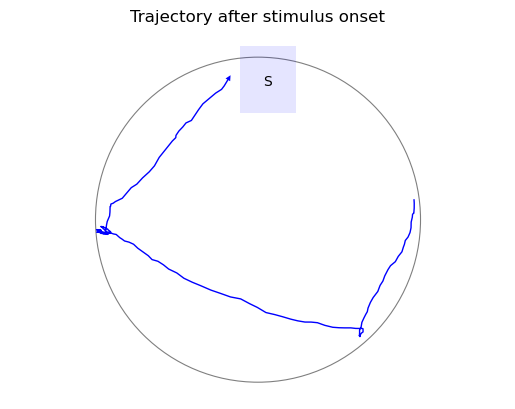

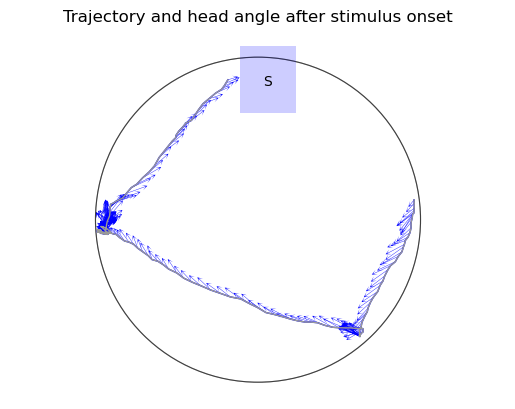

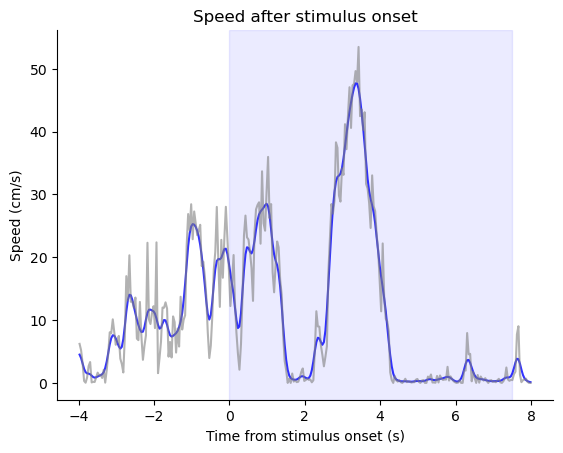

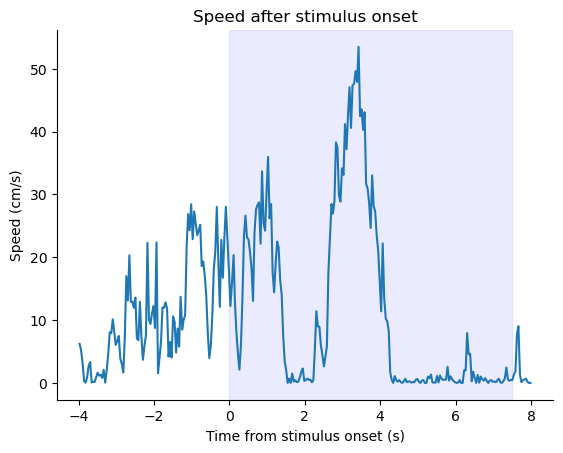

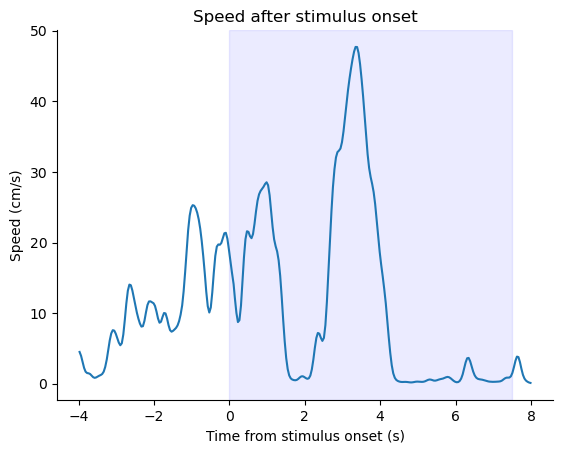

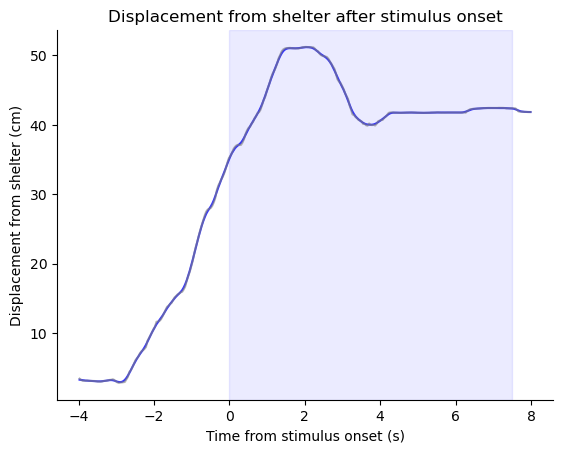

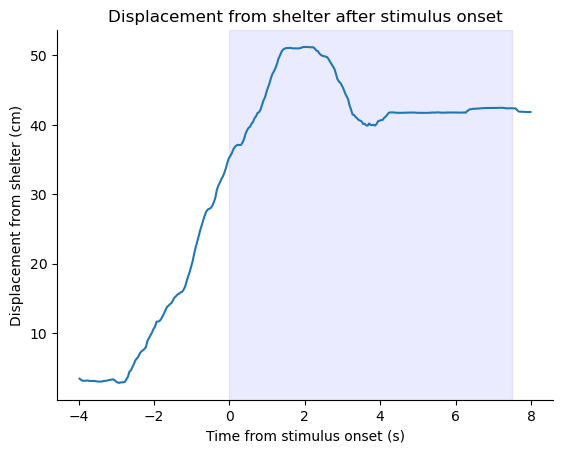

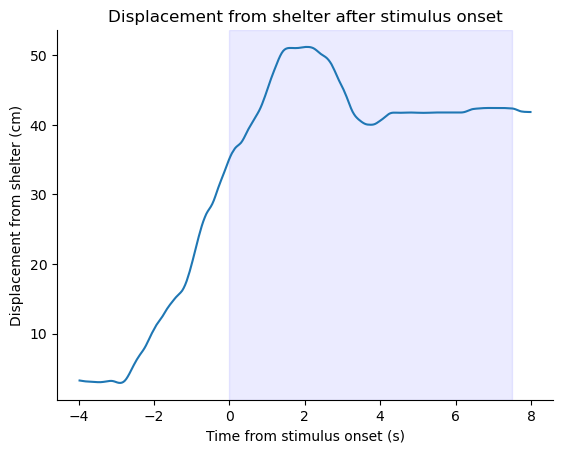

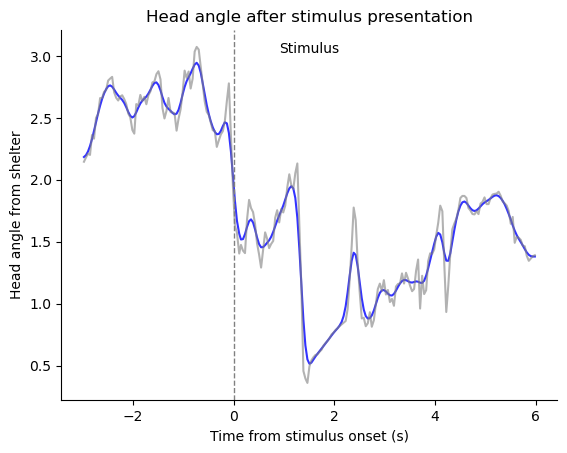

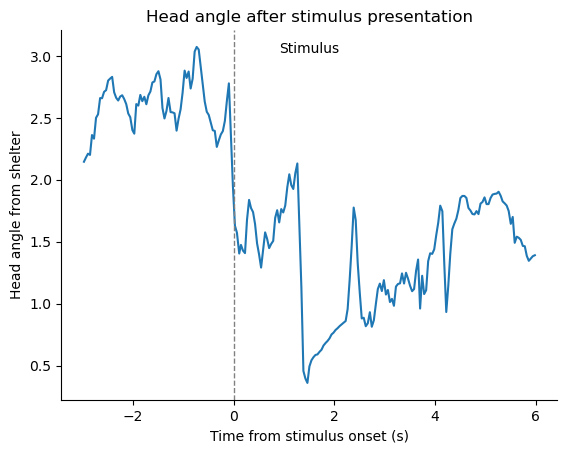

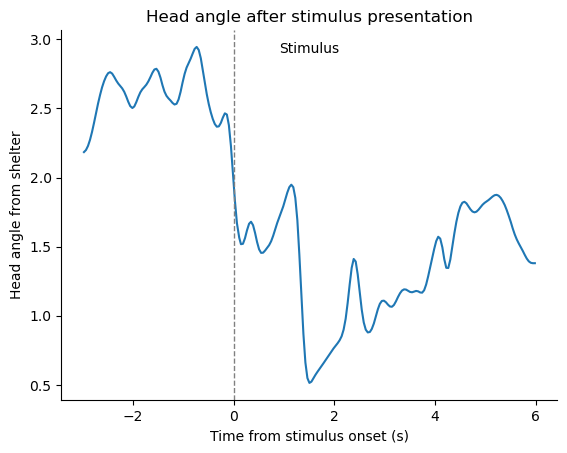

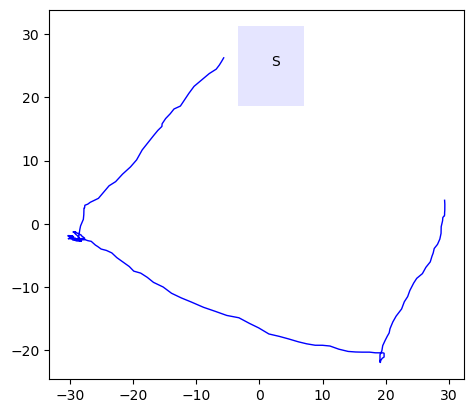

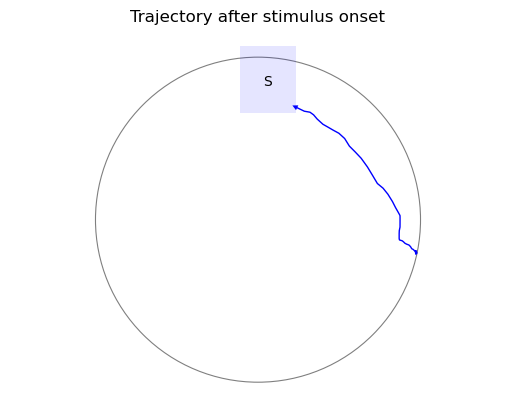

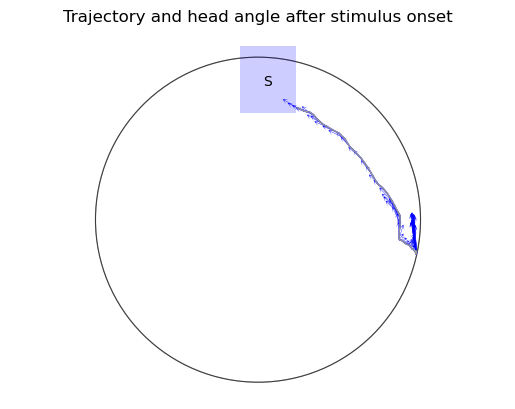

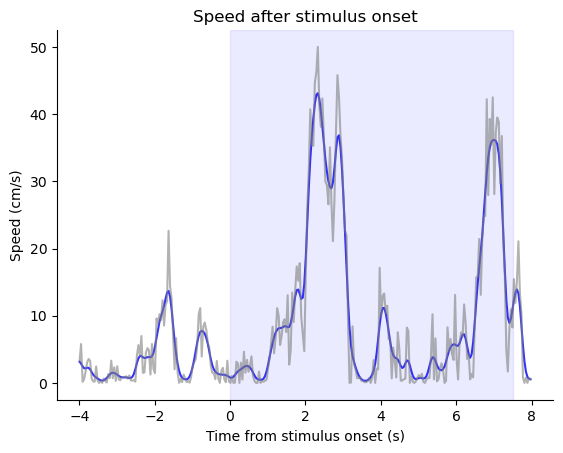

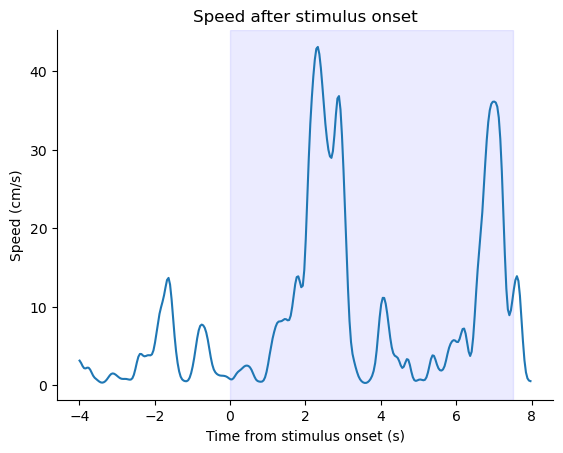

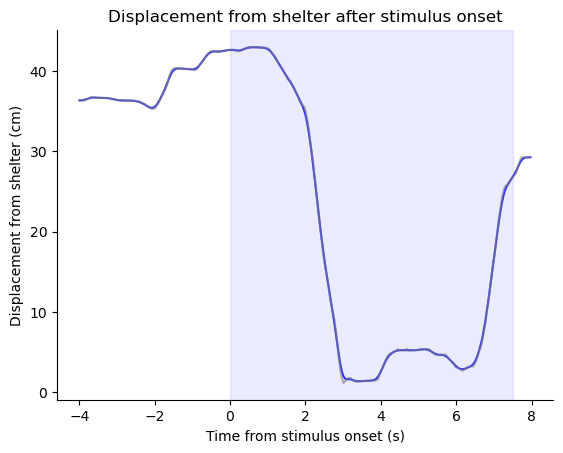

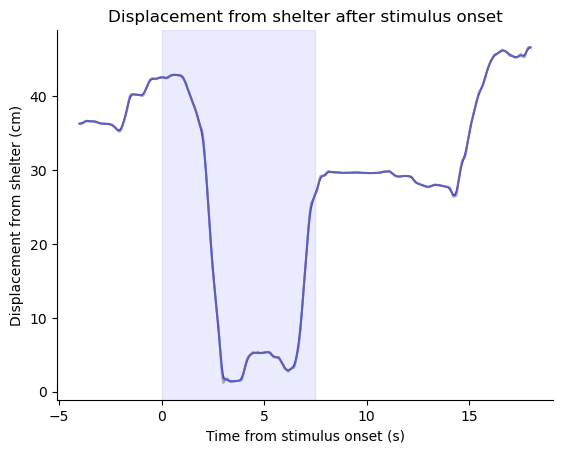

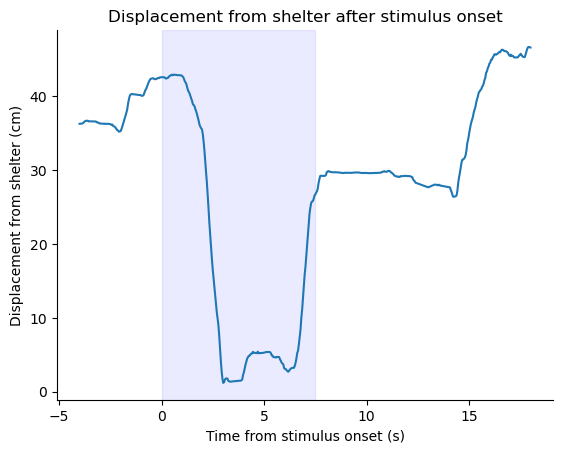

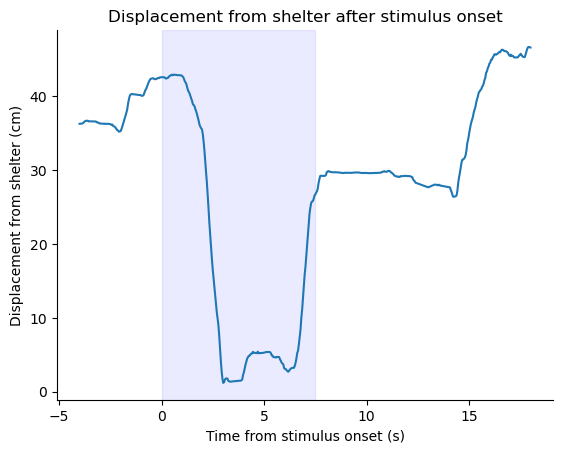

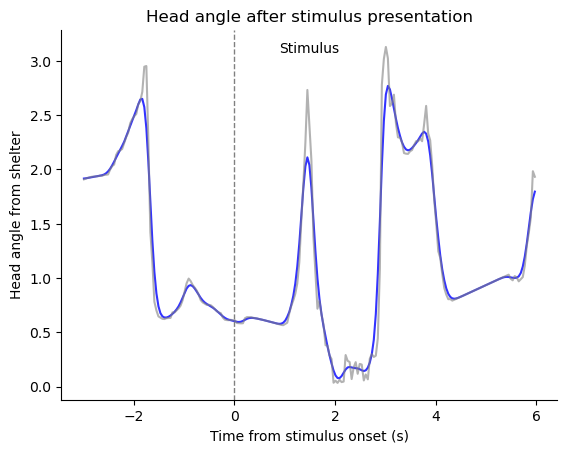

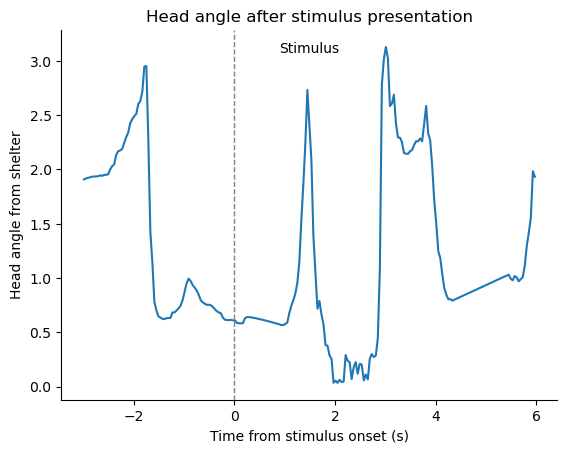

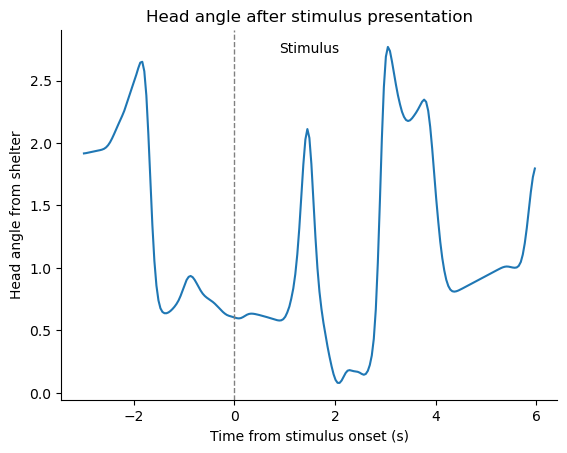

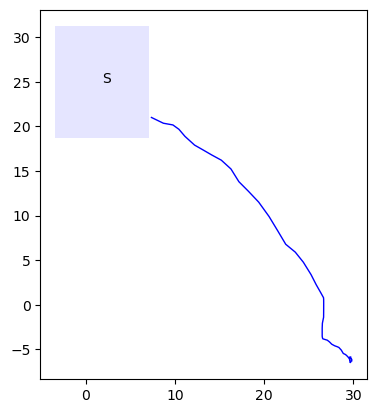

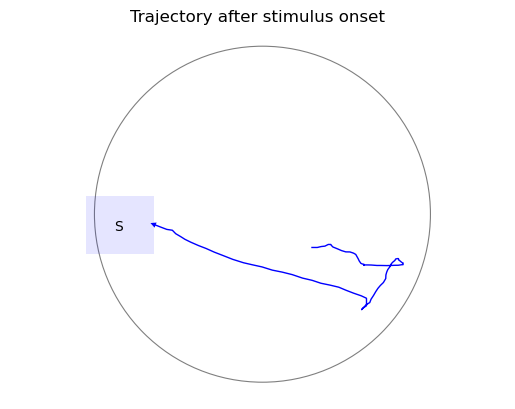

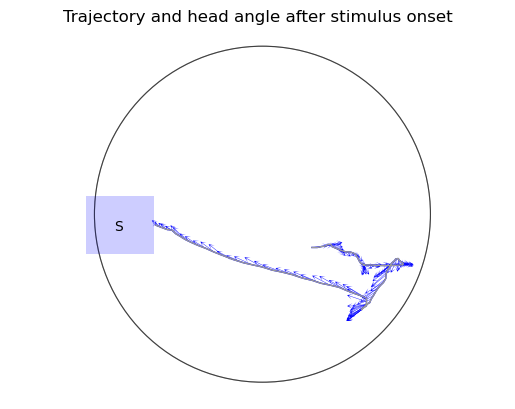

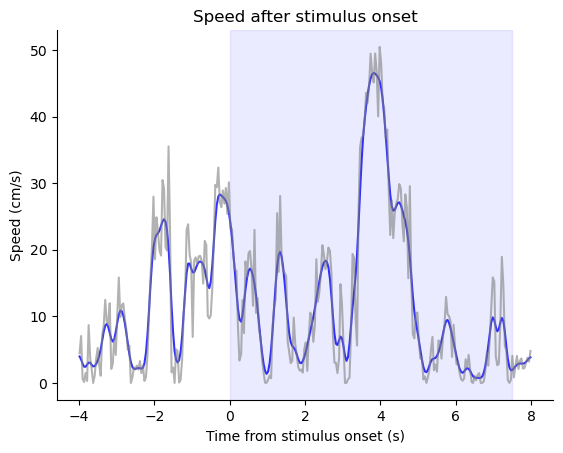

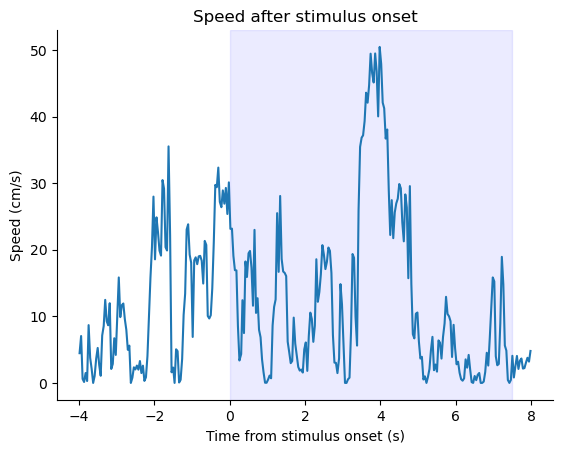

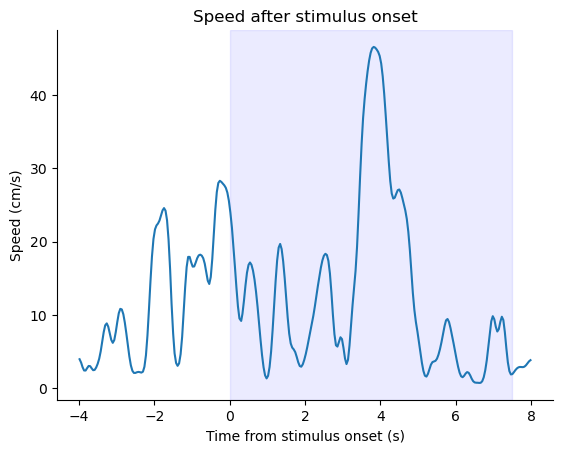

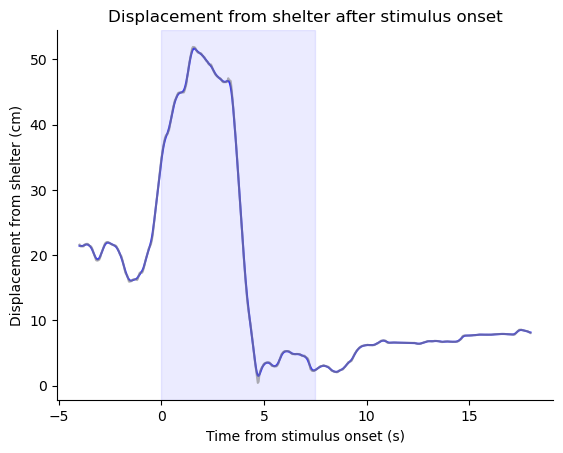

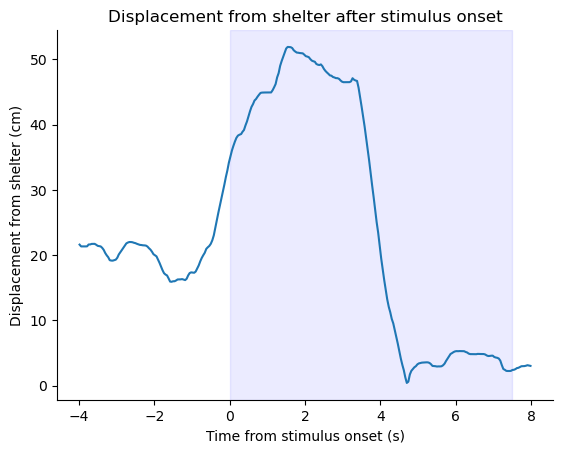

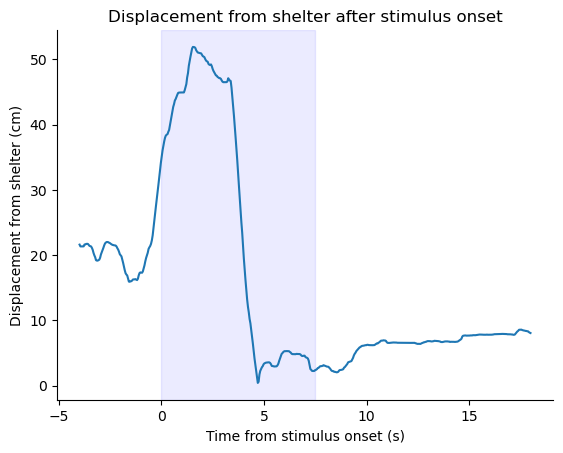

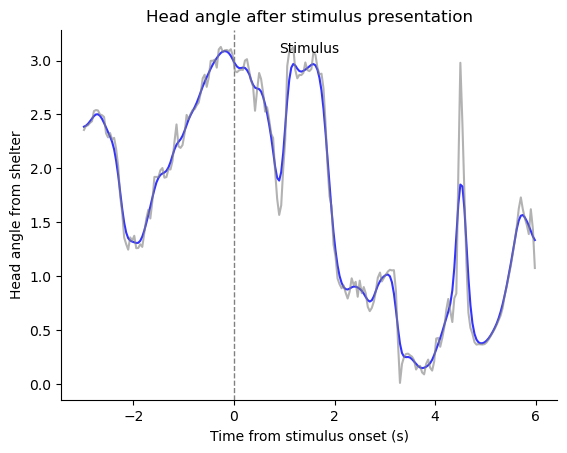

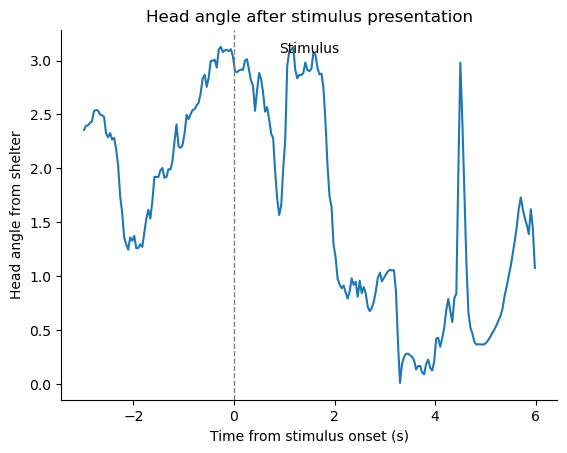

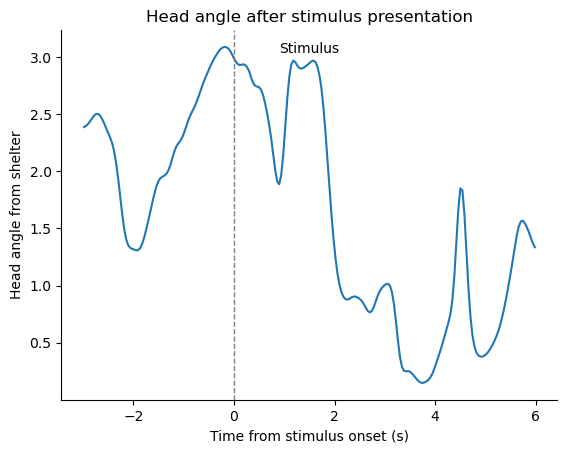

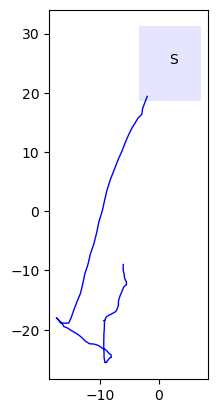

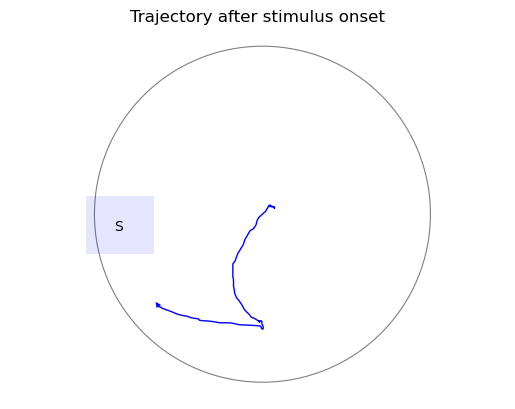

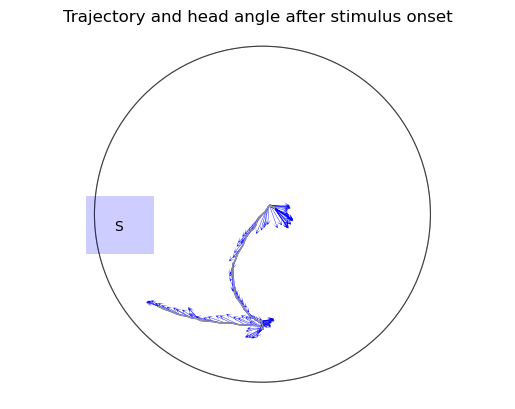

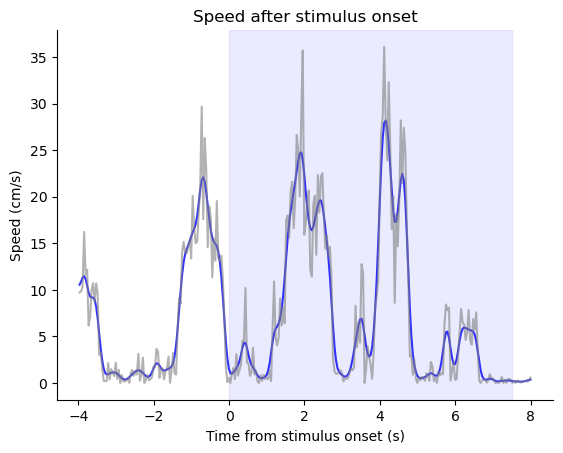

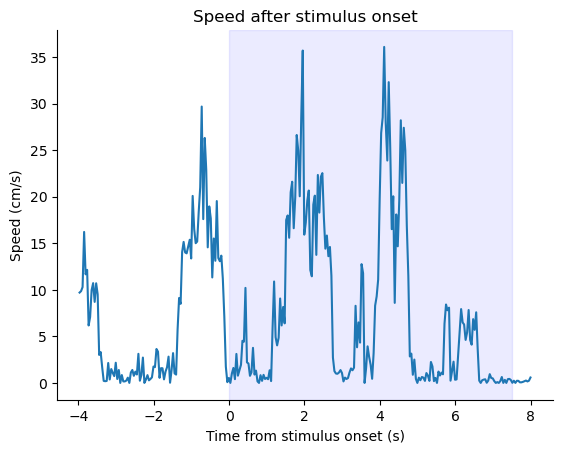

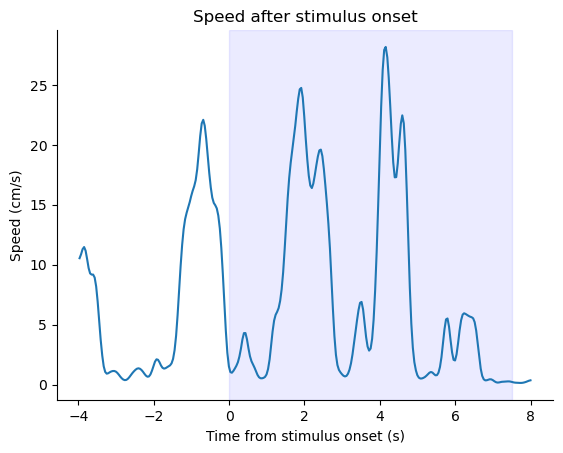

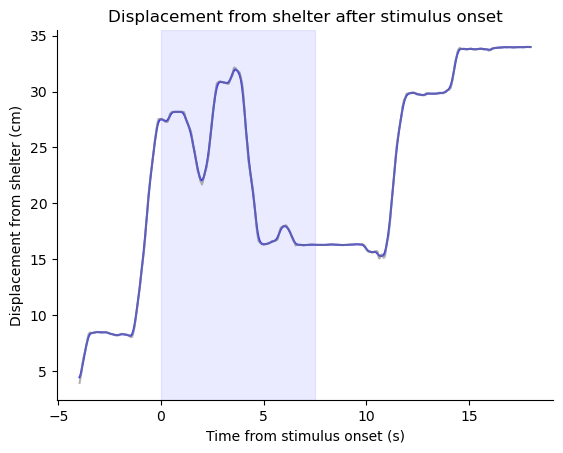

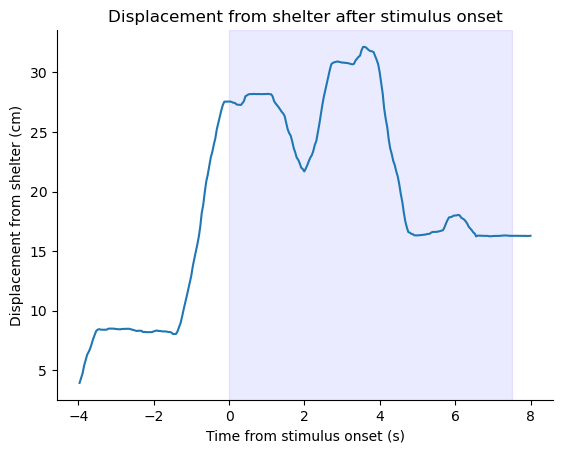

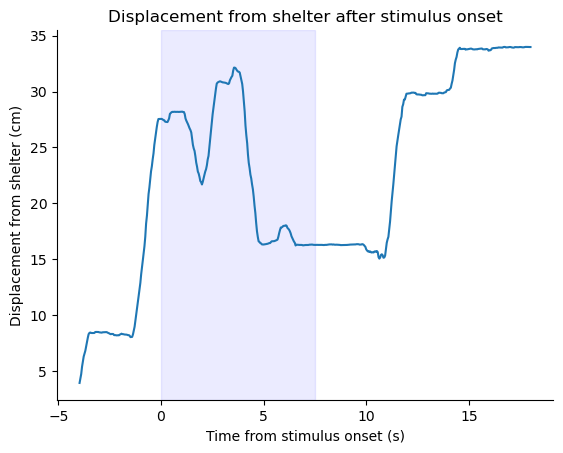

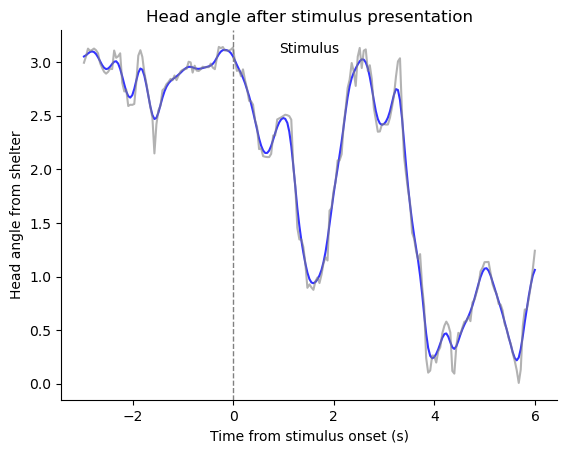

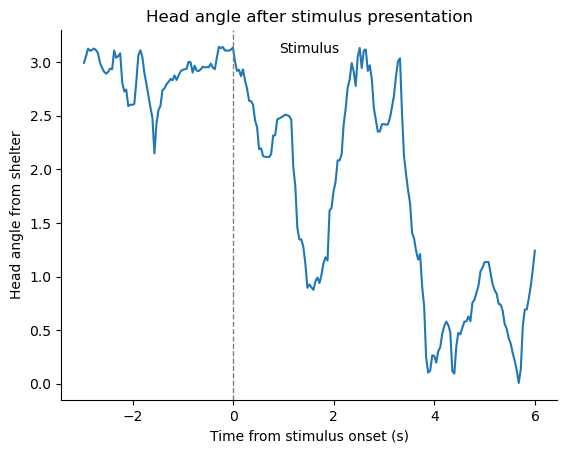

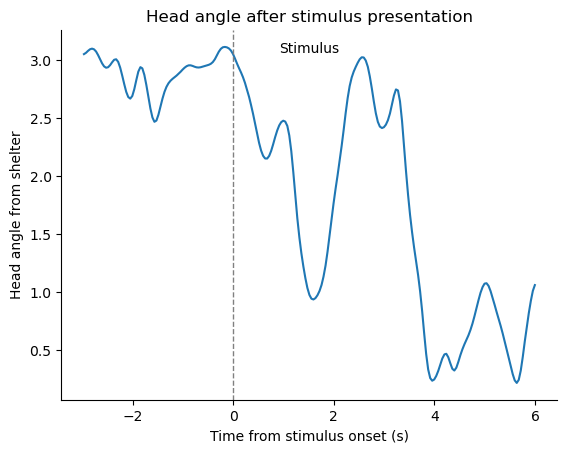

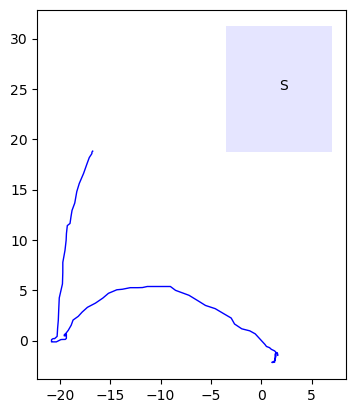

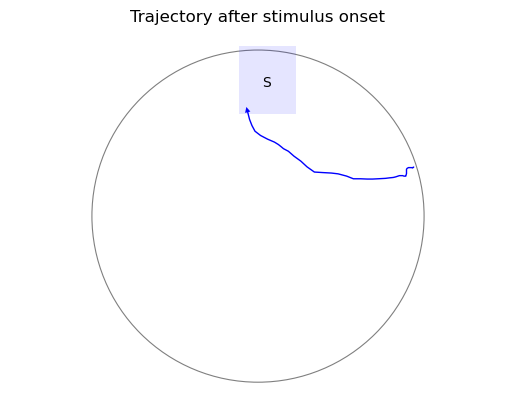

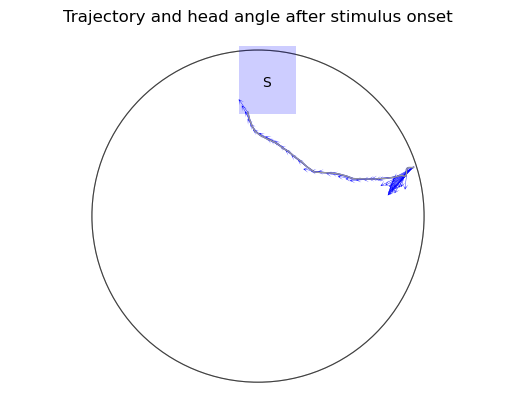

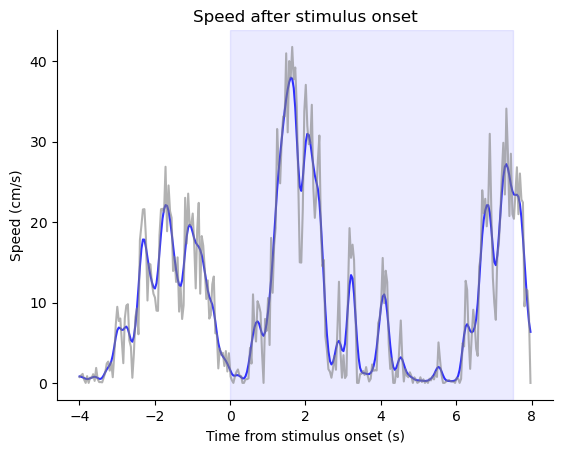

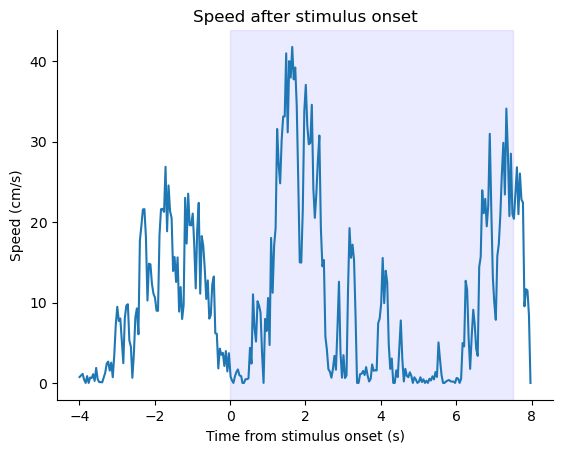

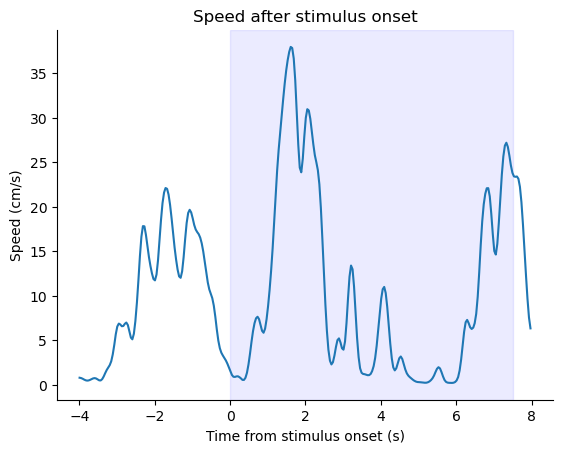

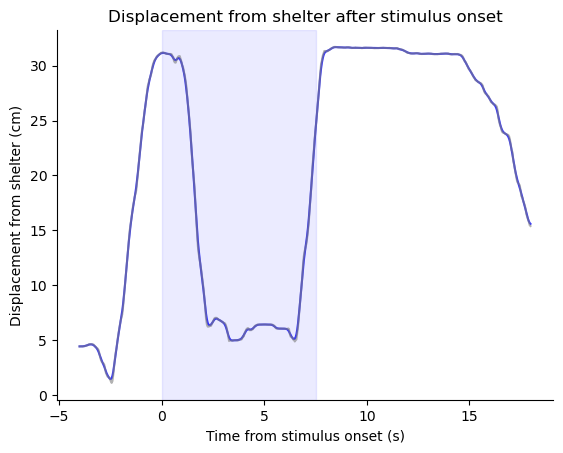

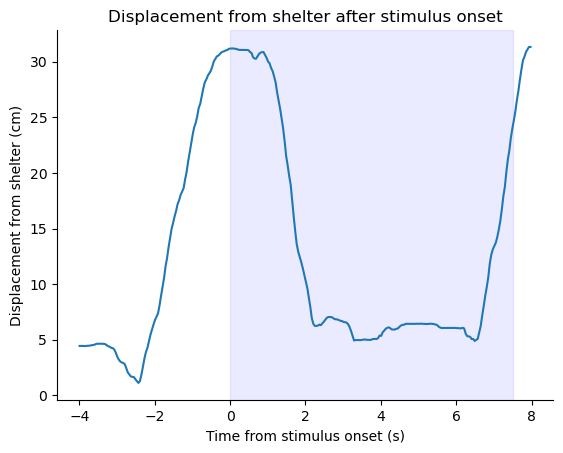

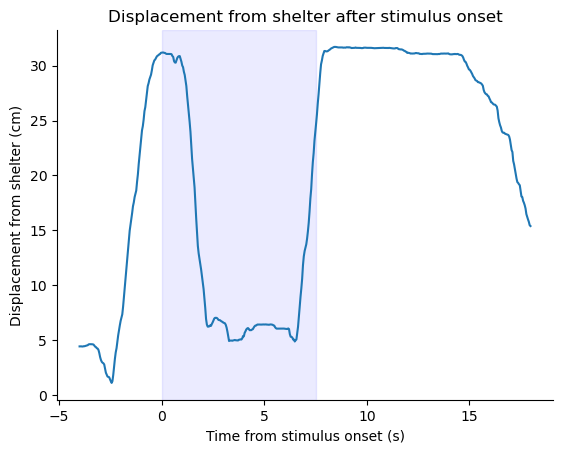

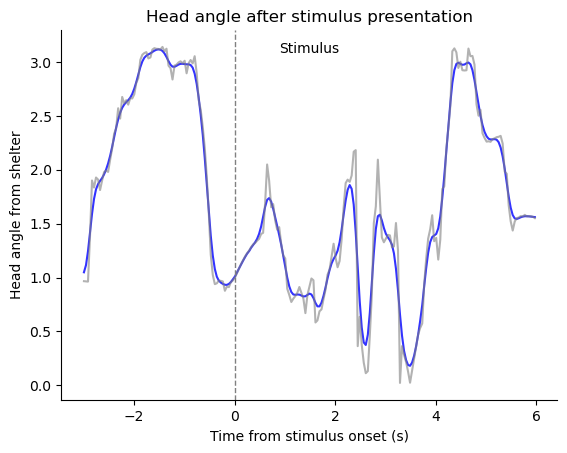

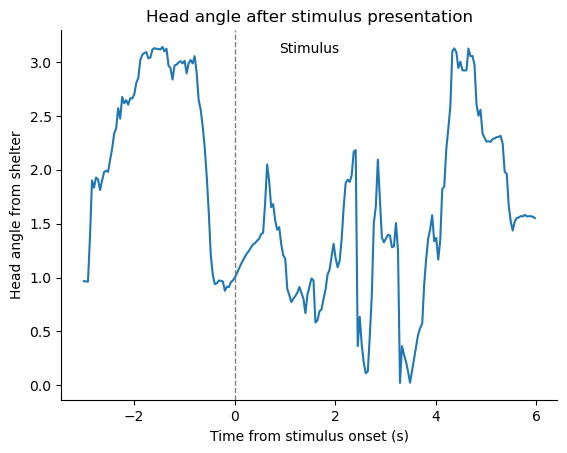

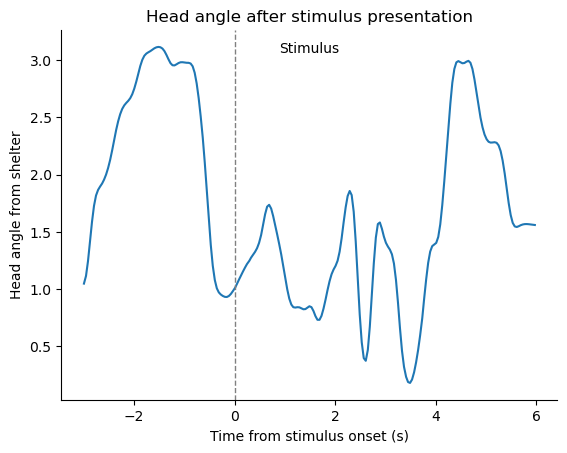

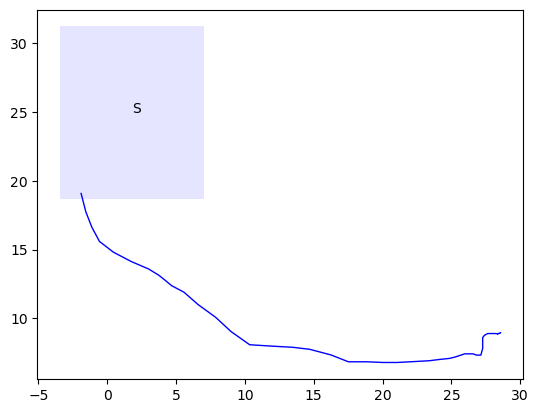

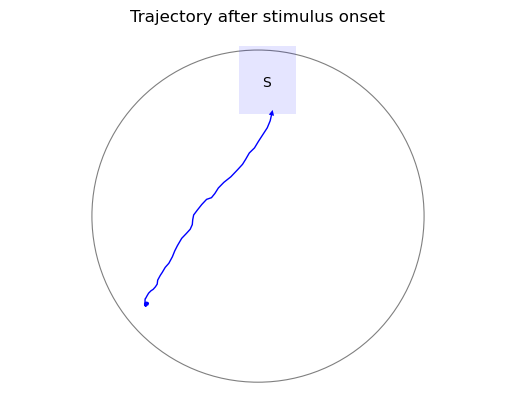

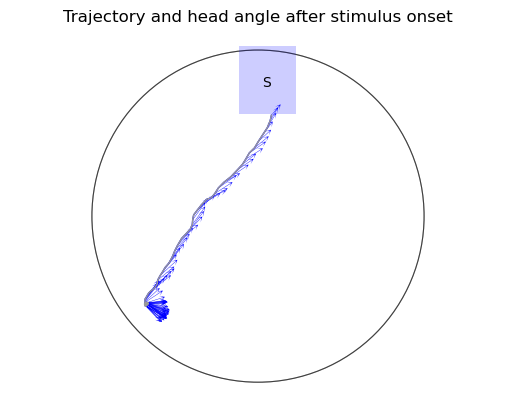

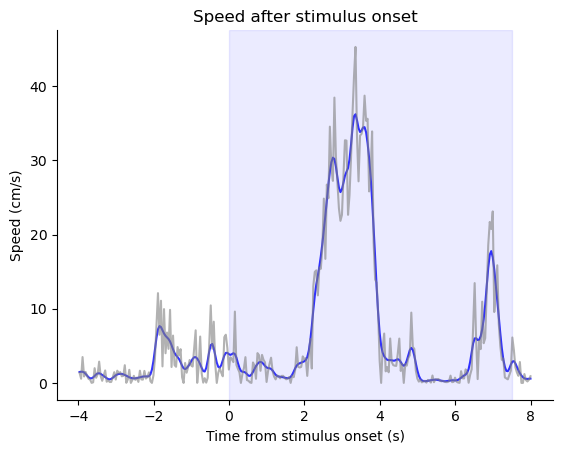

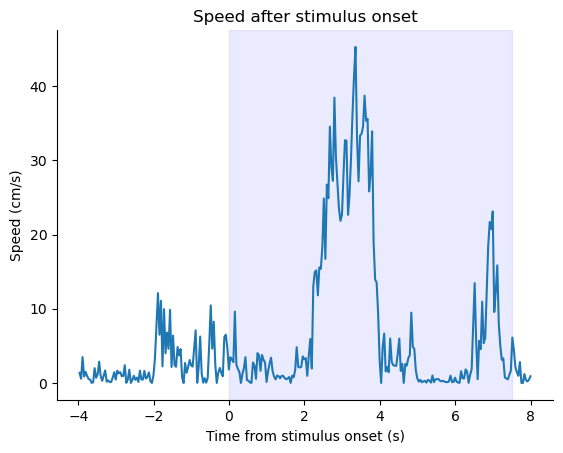

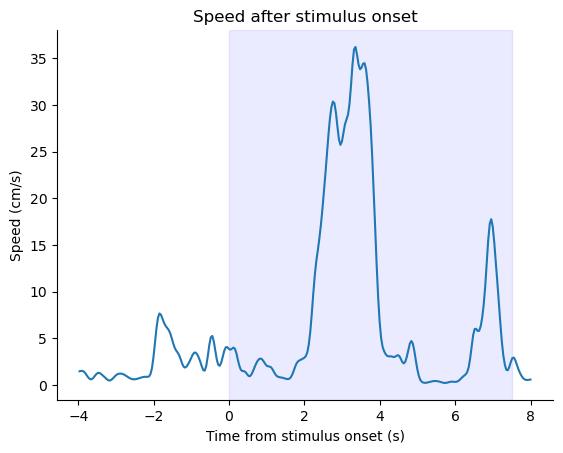

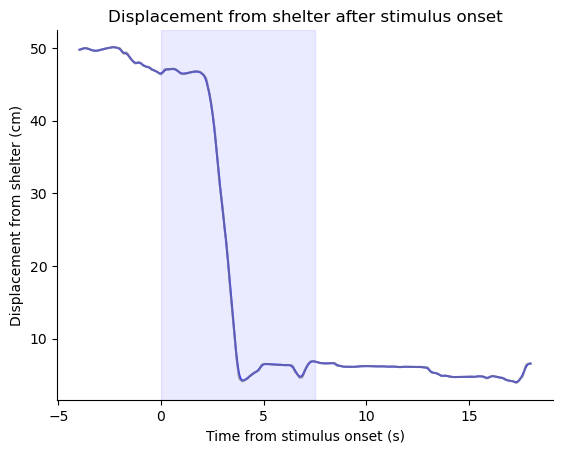

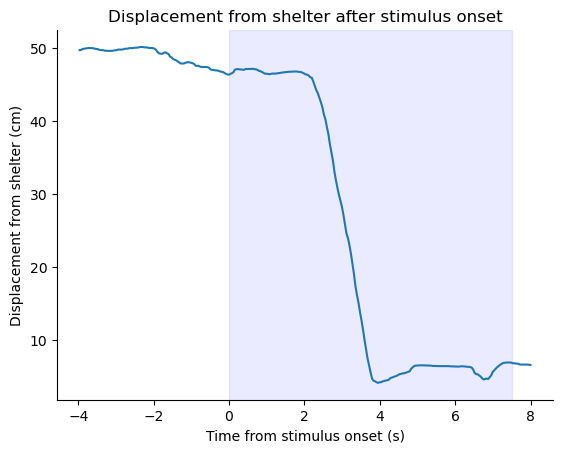

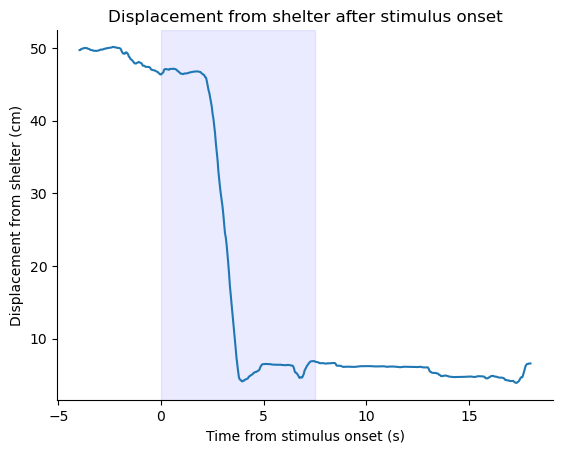

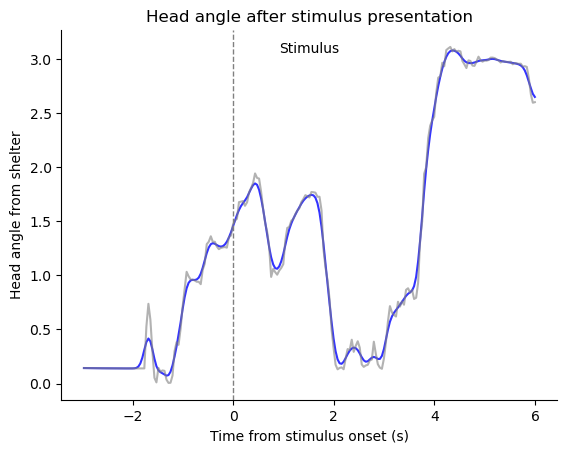

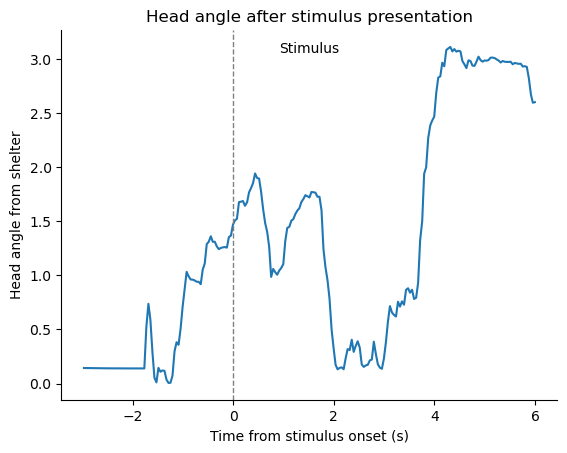

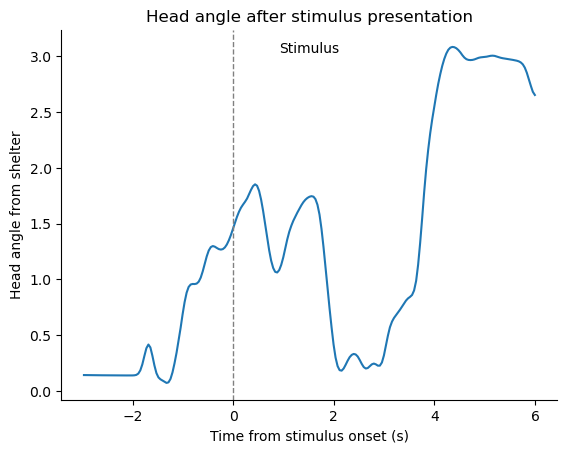

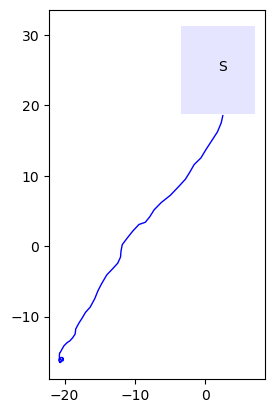

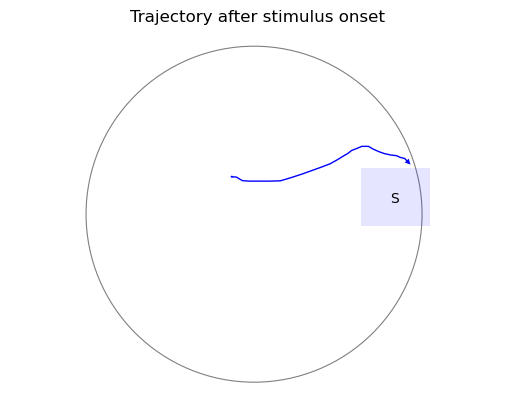

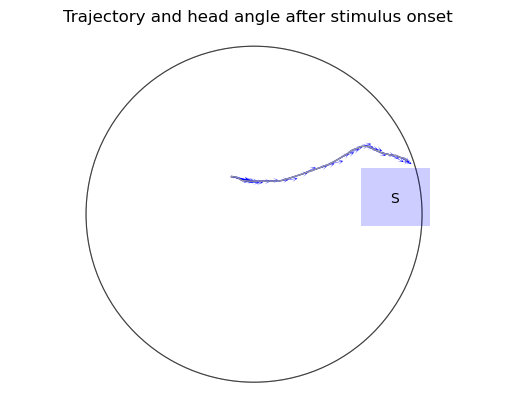

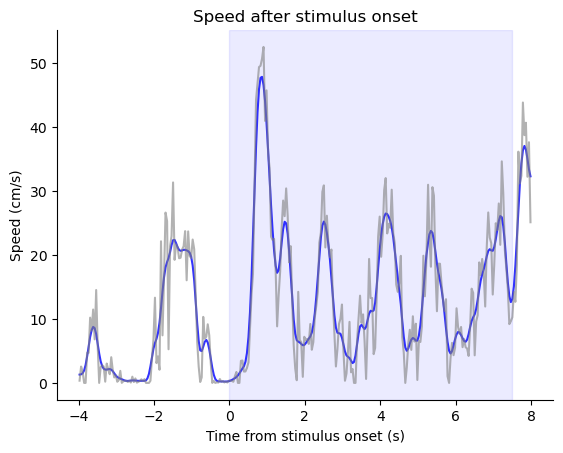

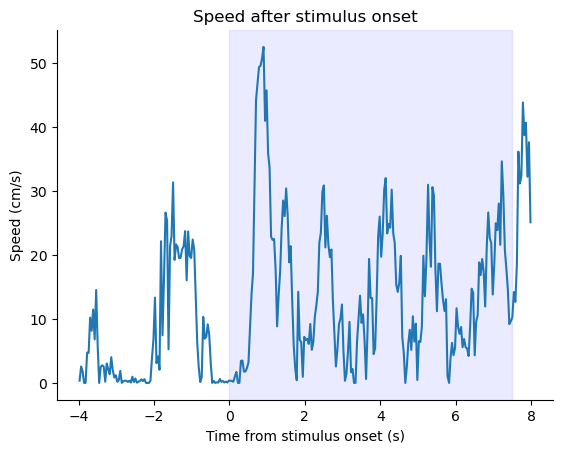

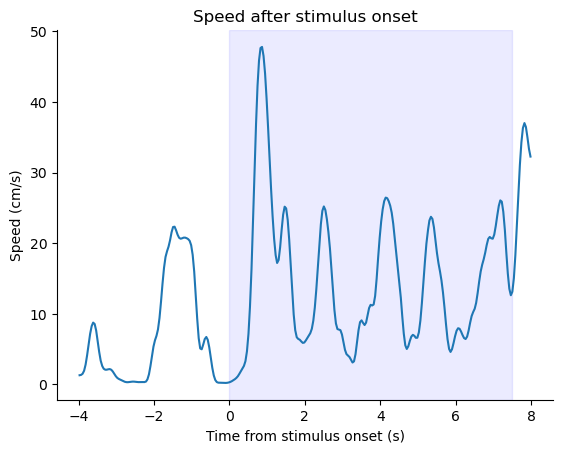

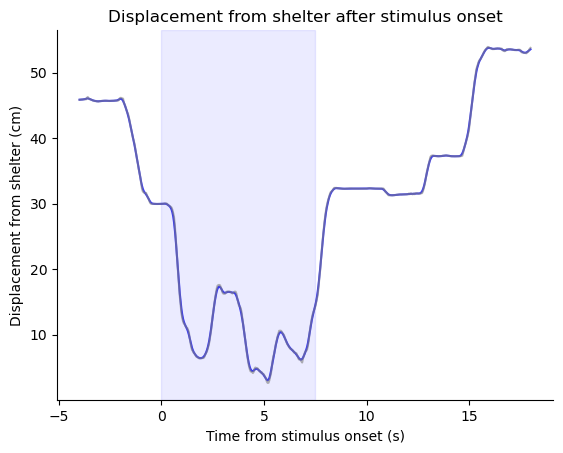

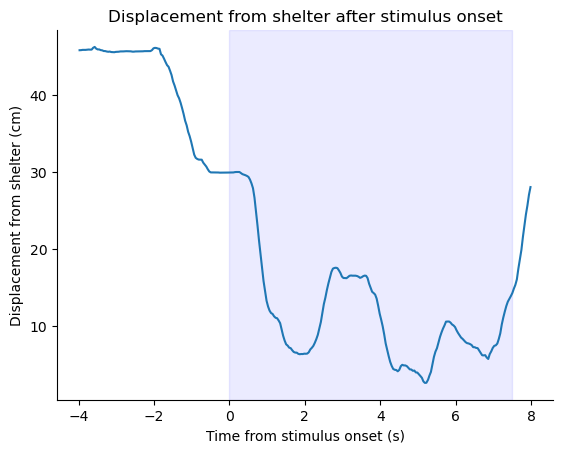

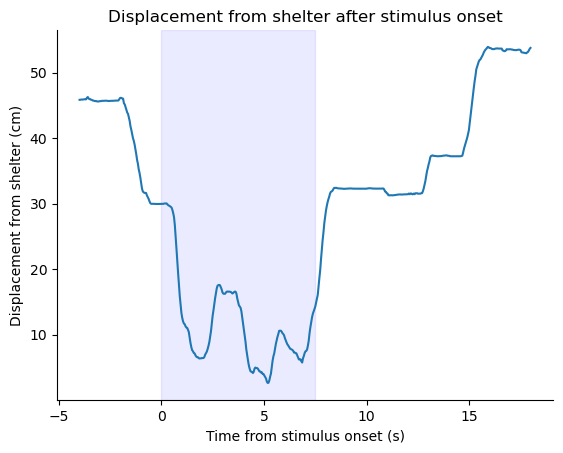

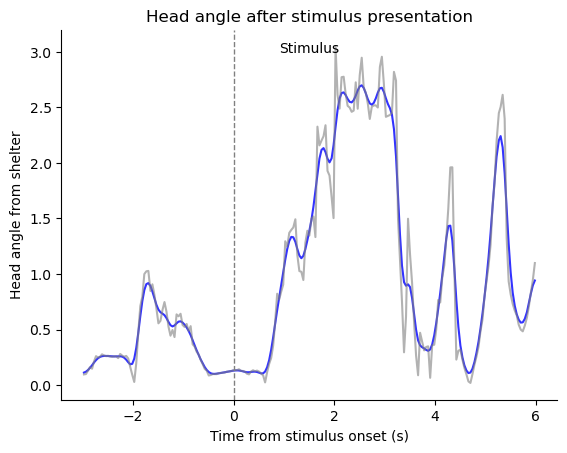

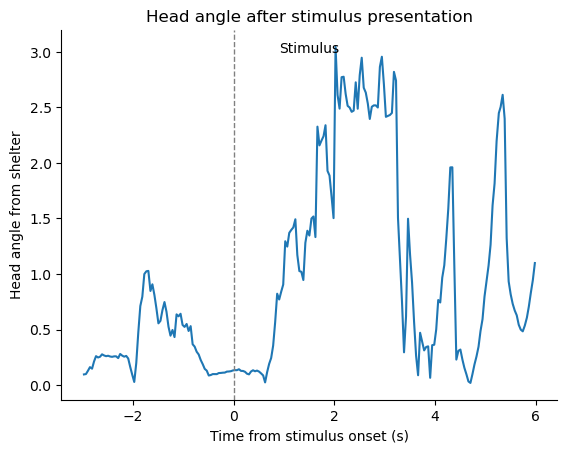

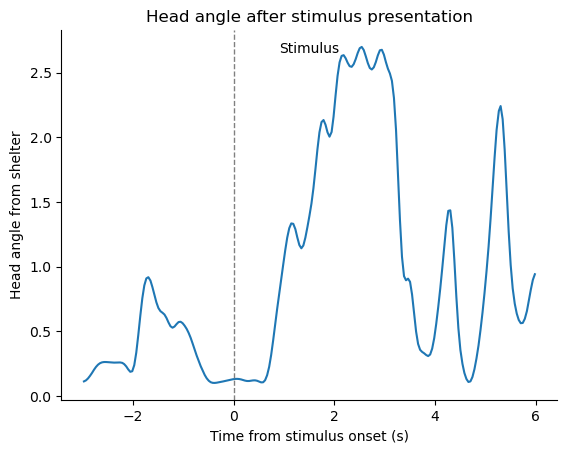

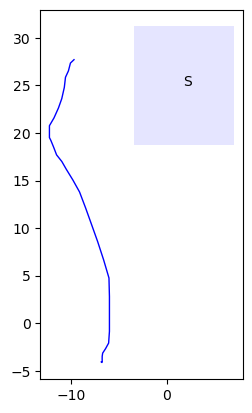

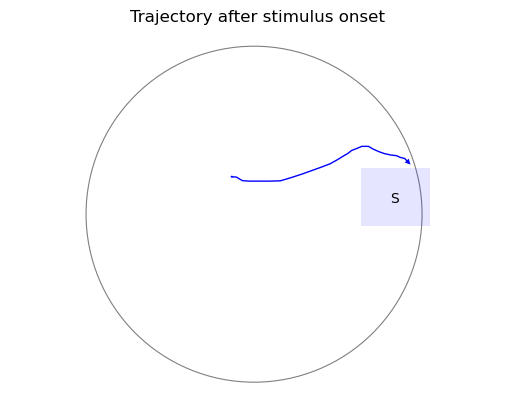

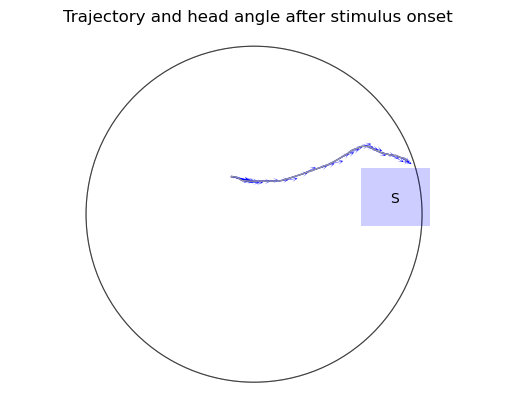

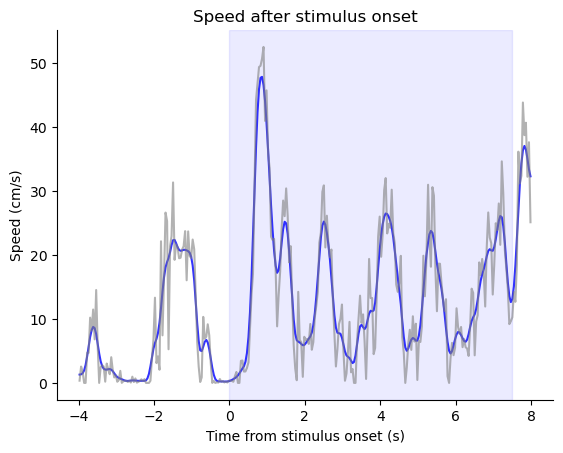

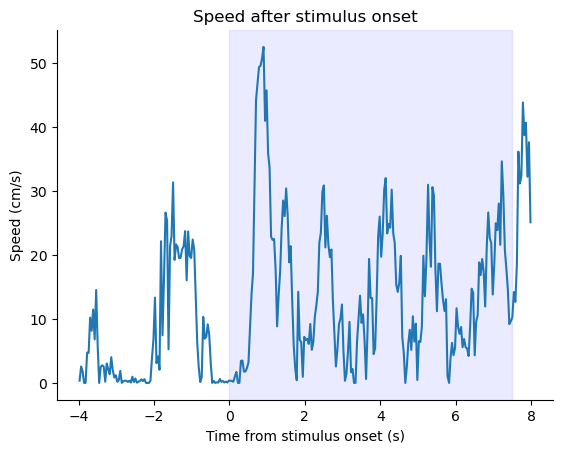

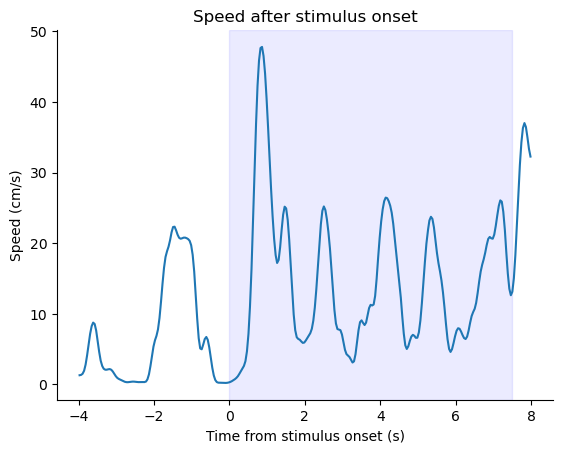

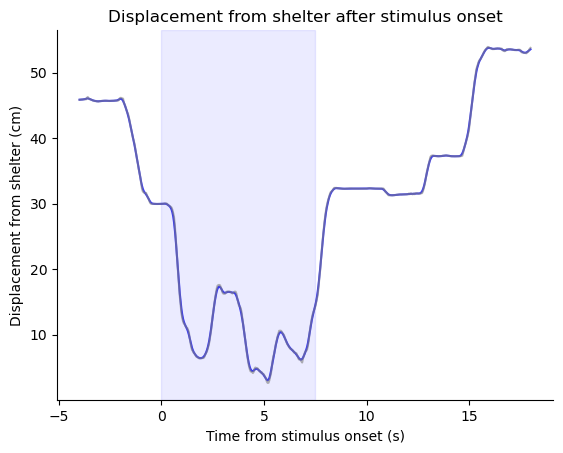

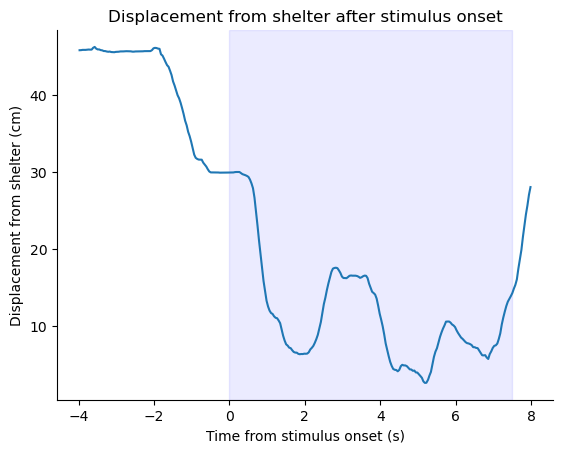

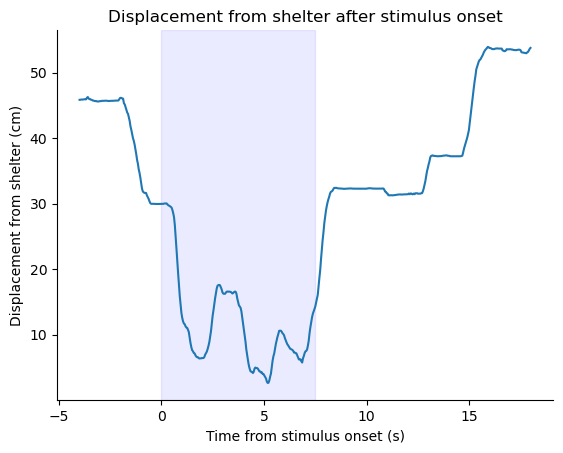

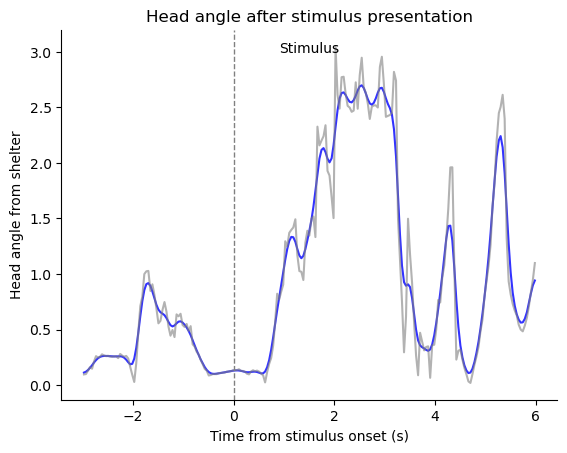

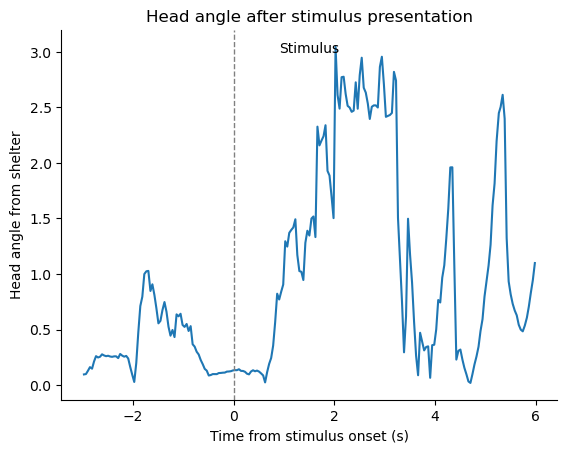

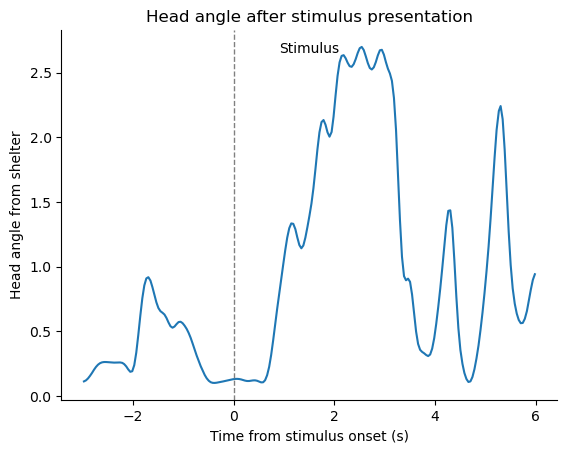

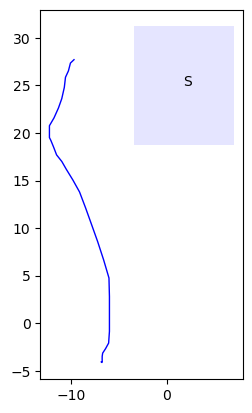

In [2]:
%run compiled_functions_recent.ipynb

%run compiled_trajectory.ipynb

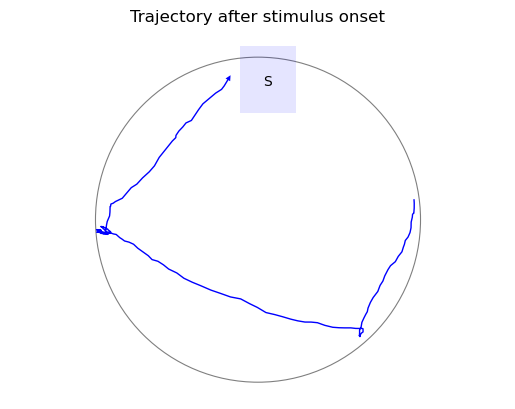

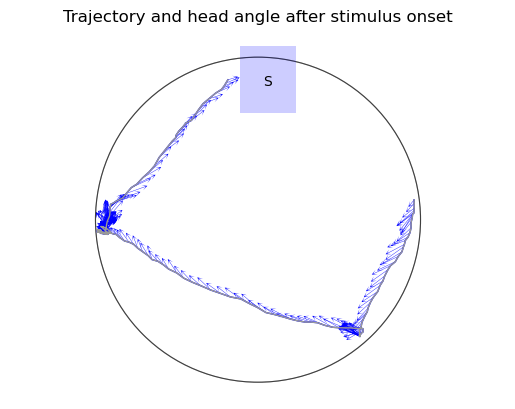

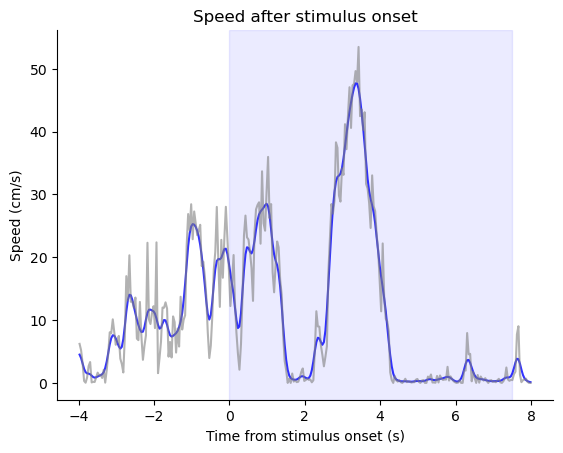

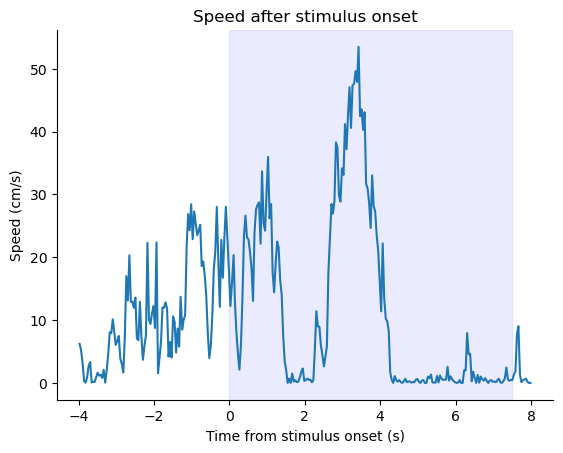

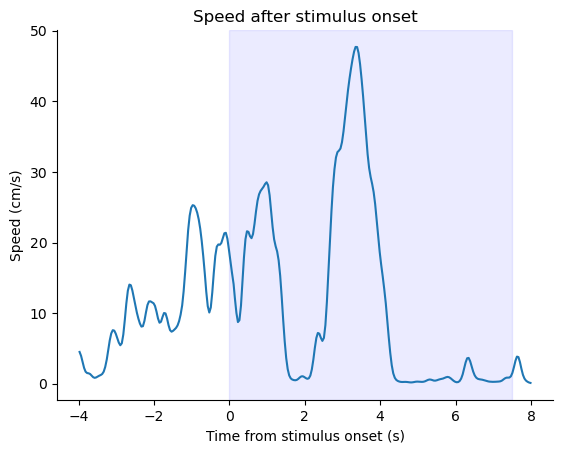

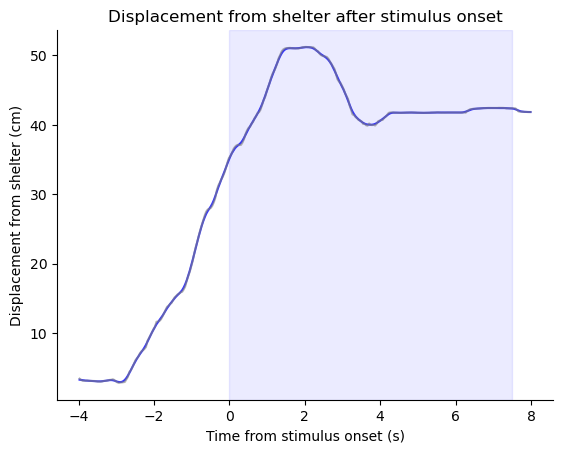

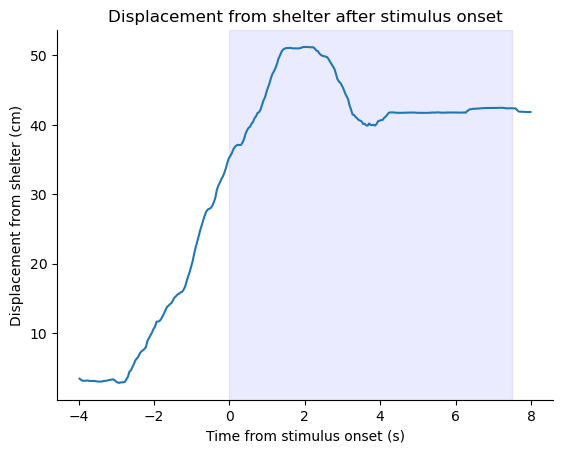

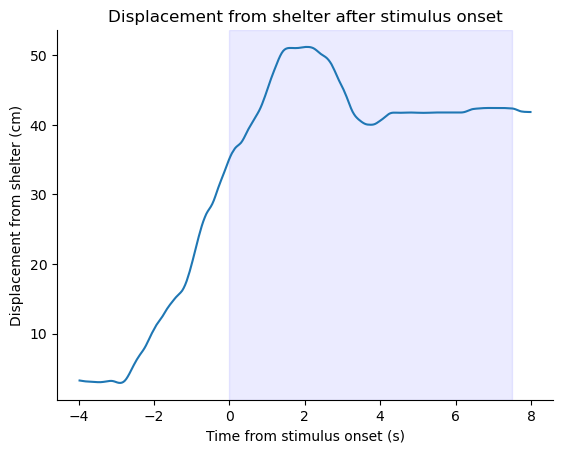

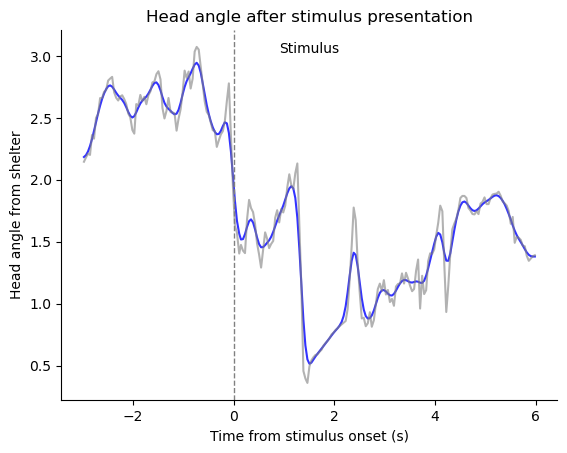

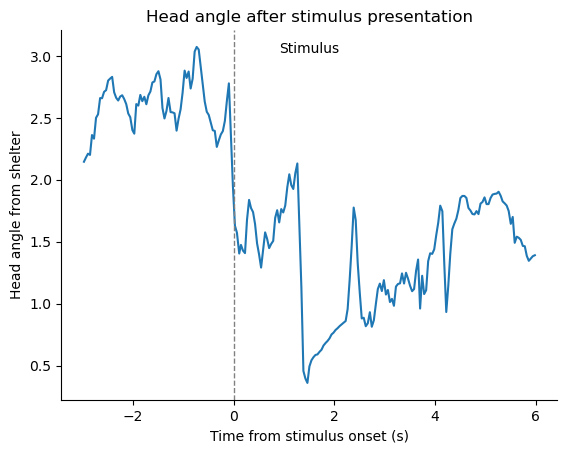

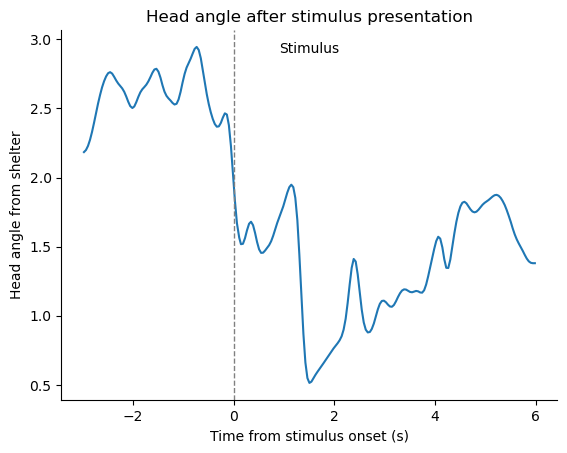

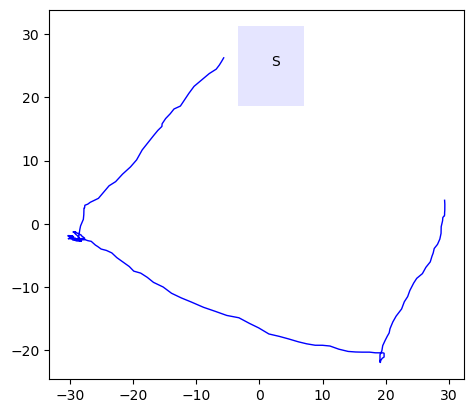

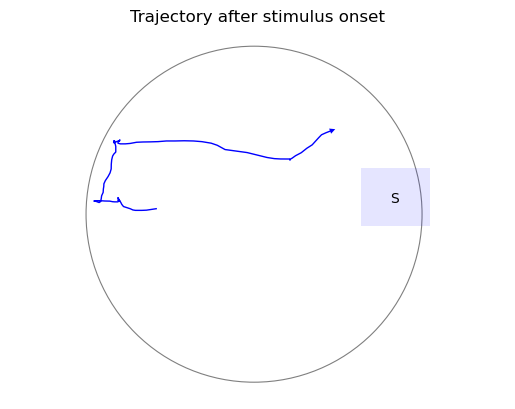

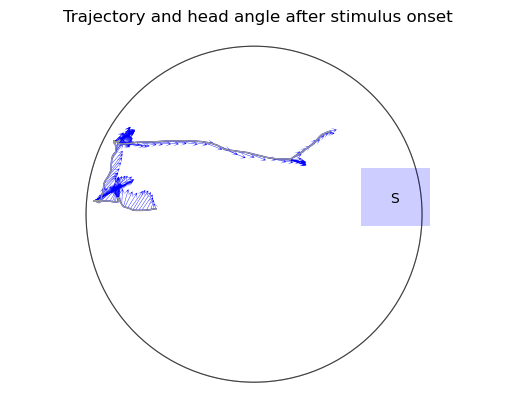

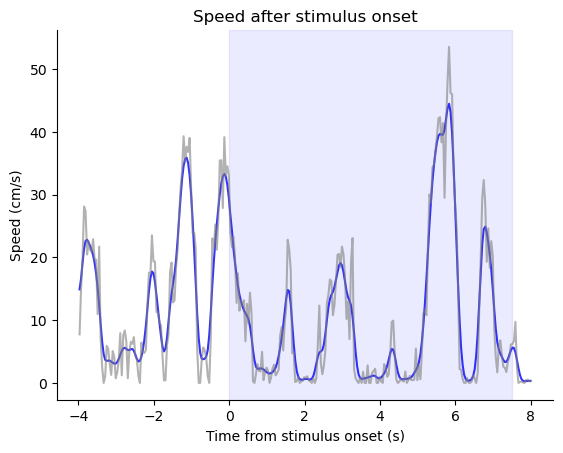

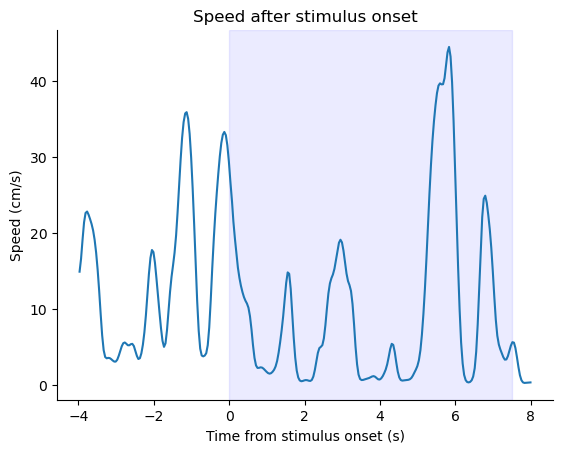

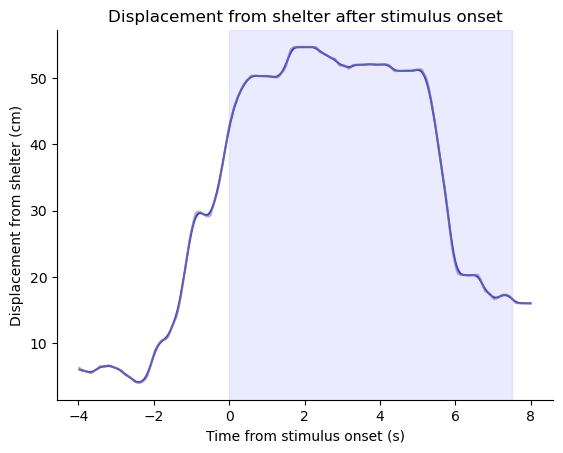

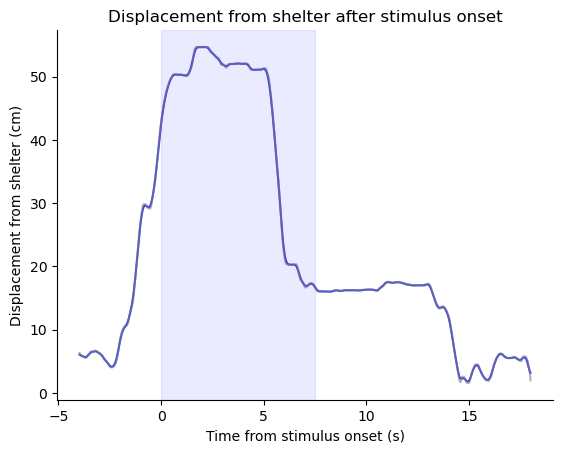

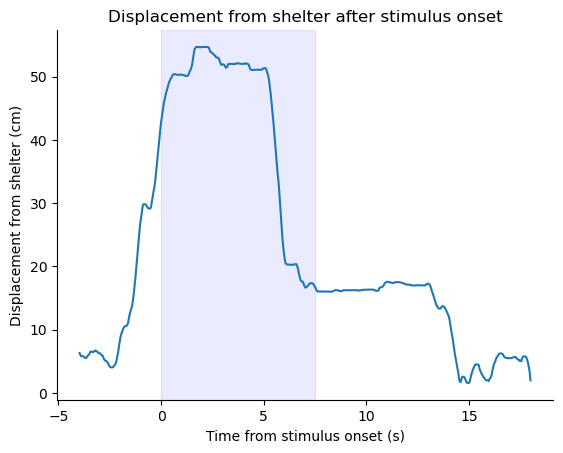

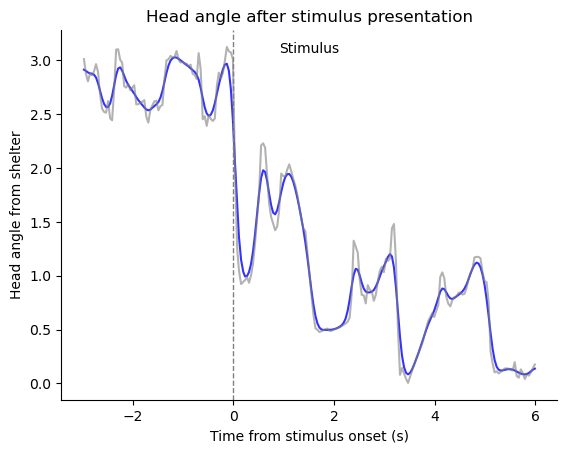

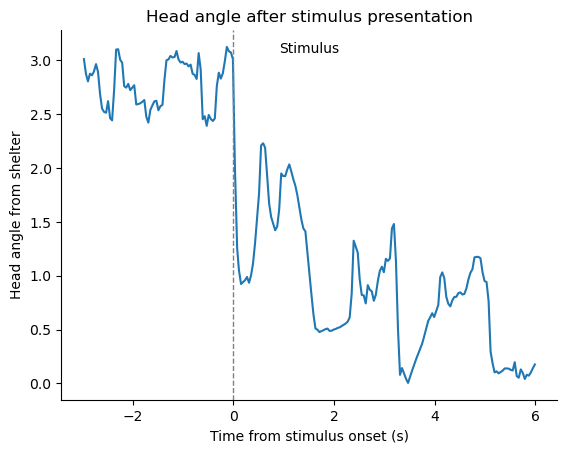

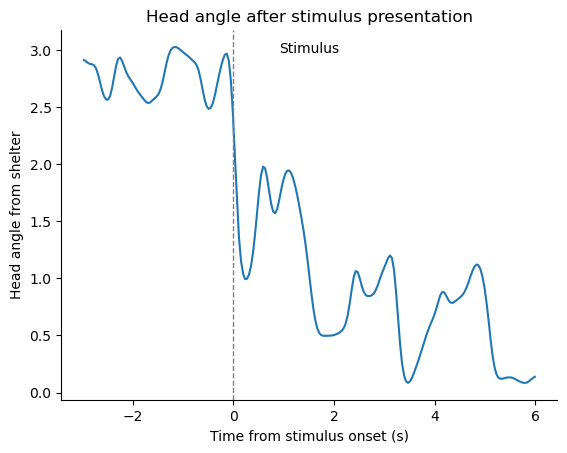

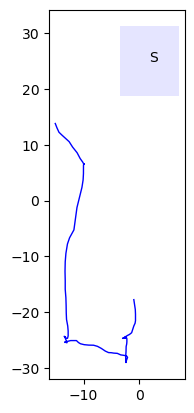

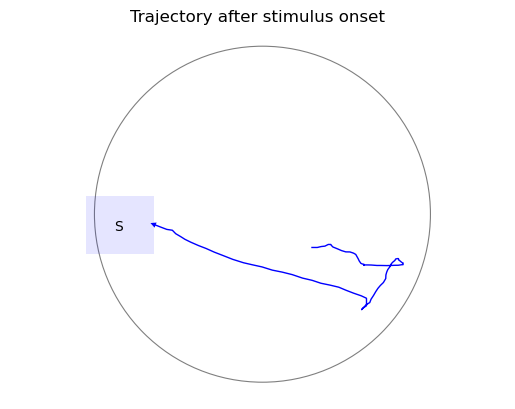

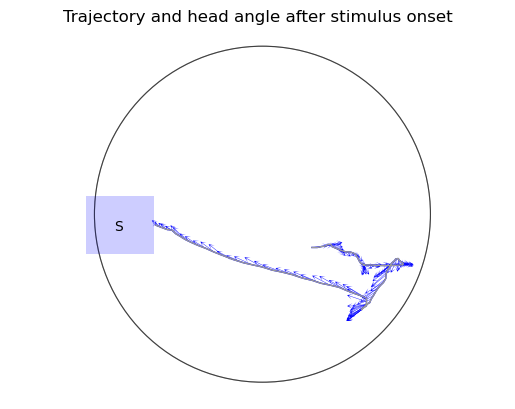

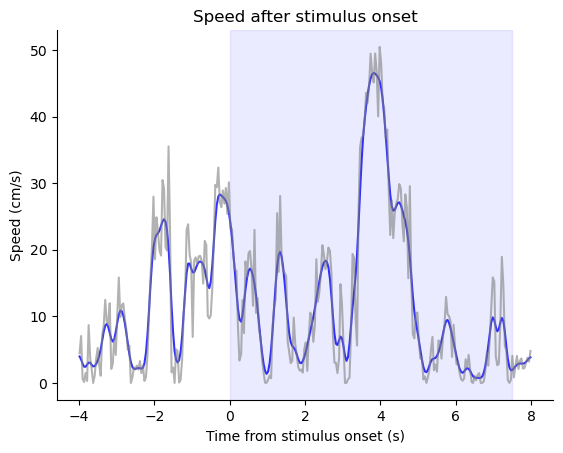

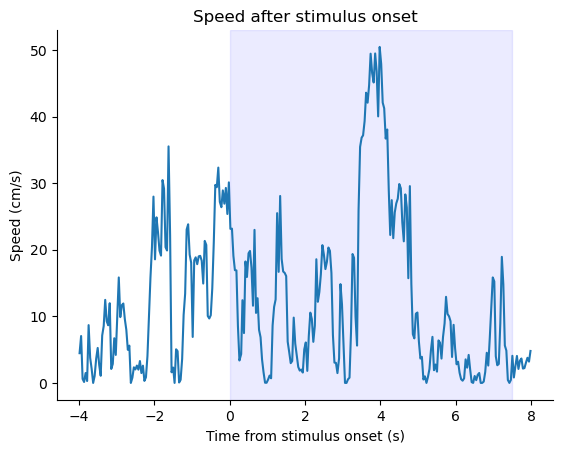

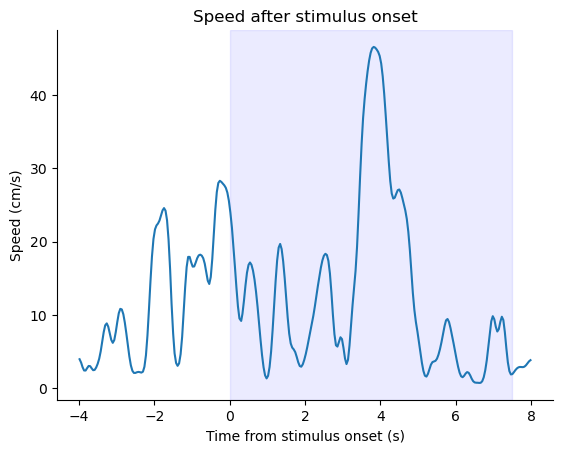

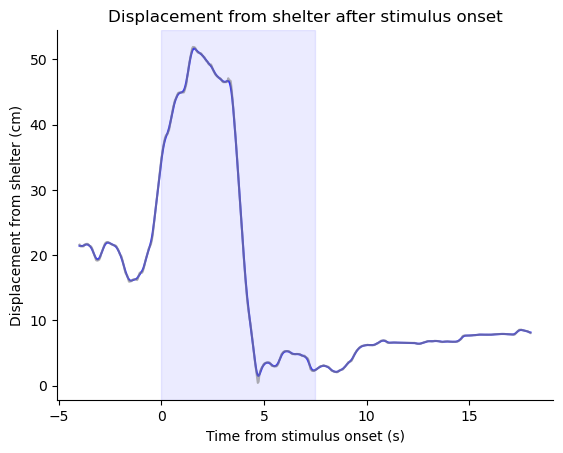

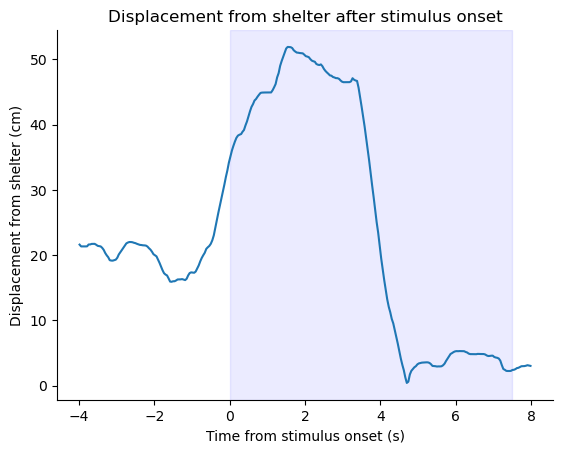

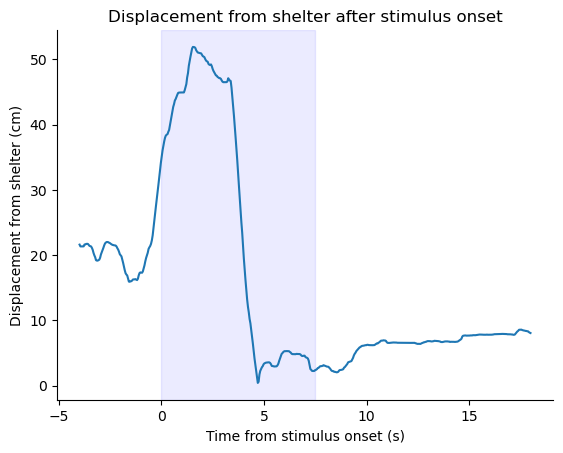

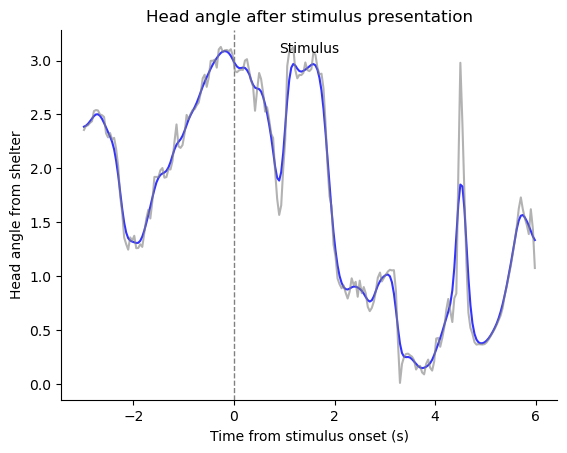

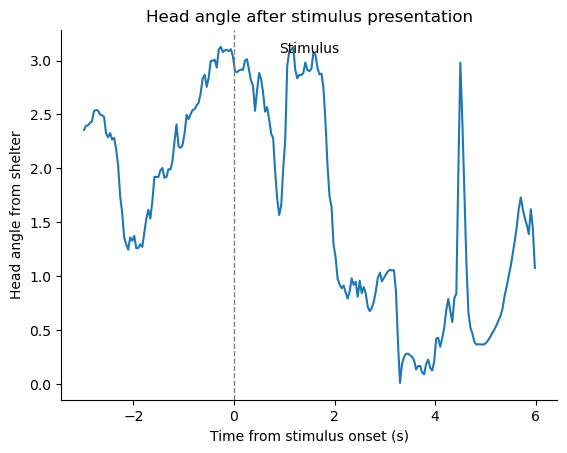

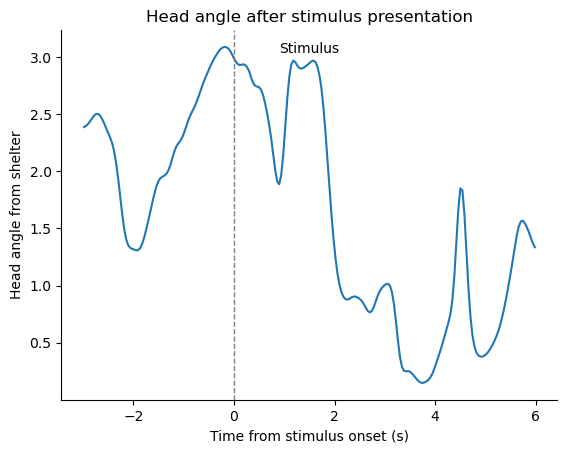

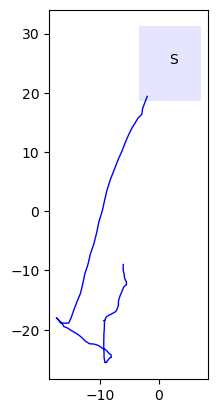

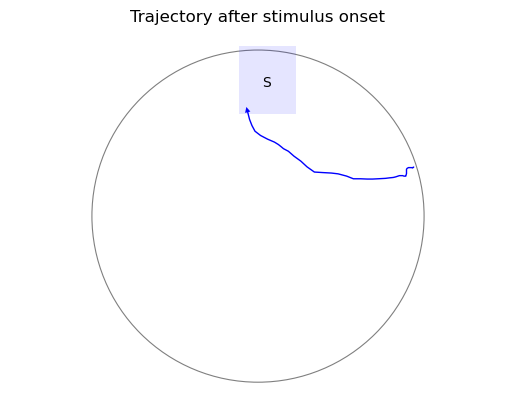

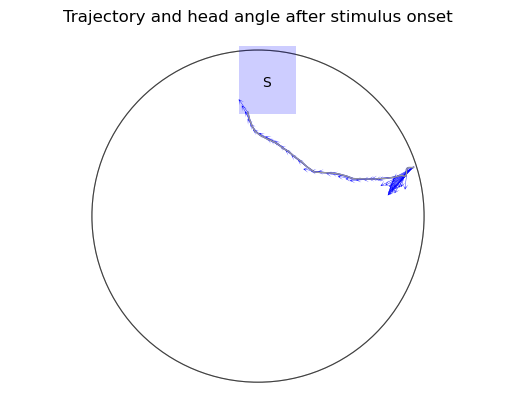

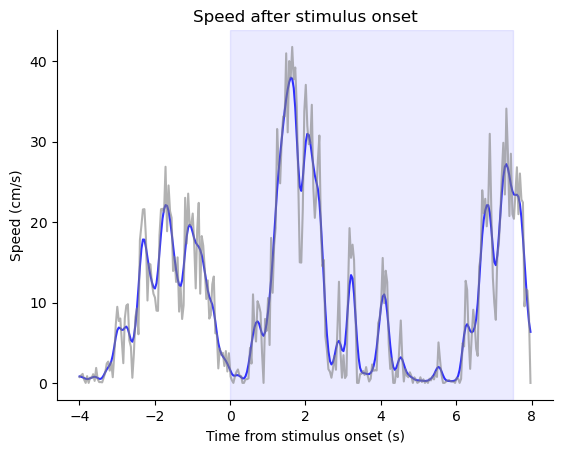

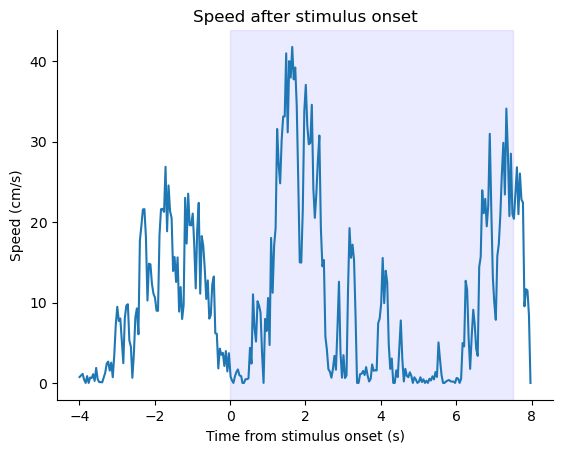

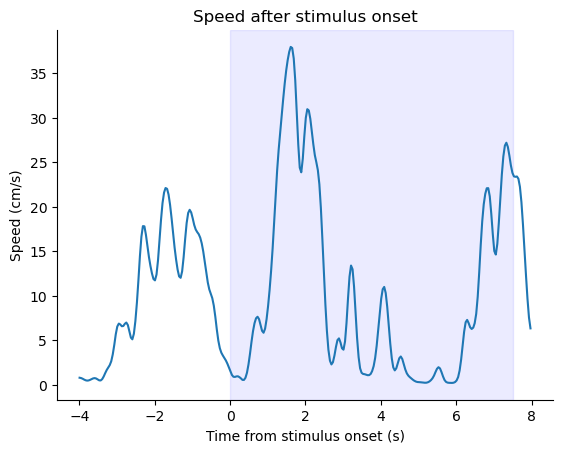

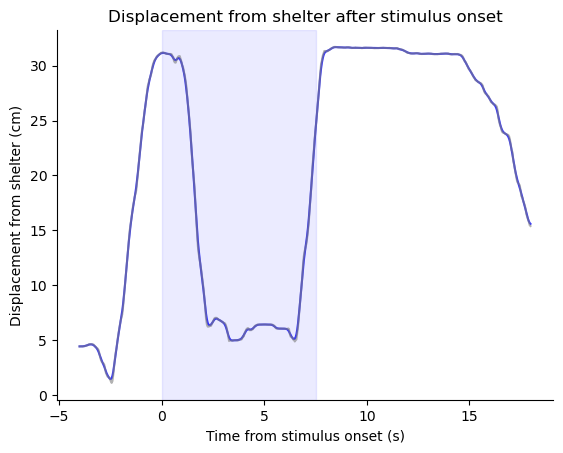

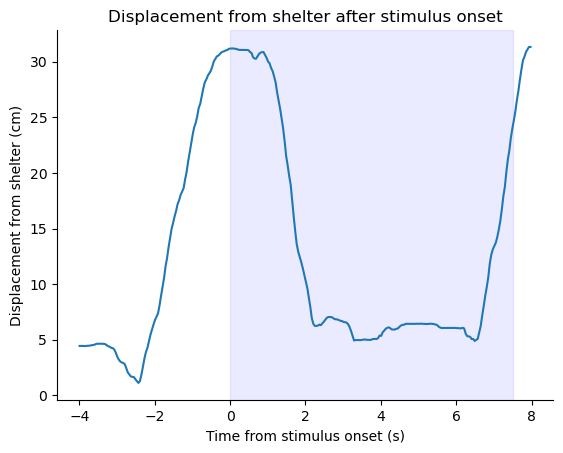

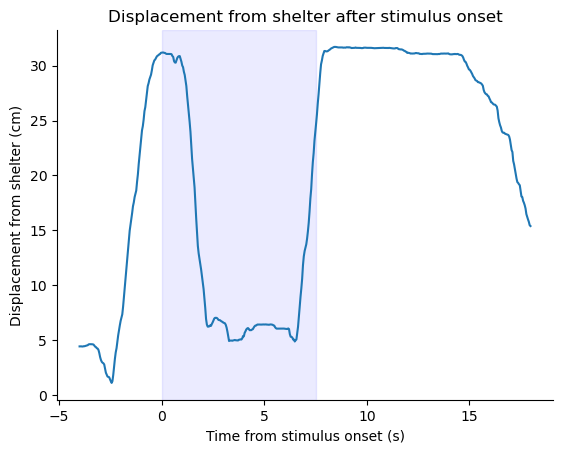

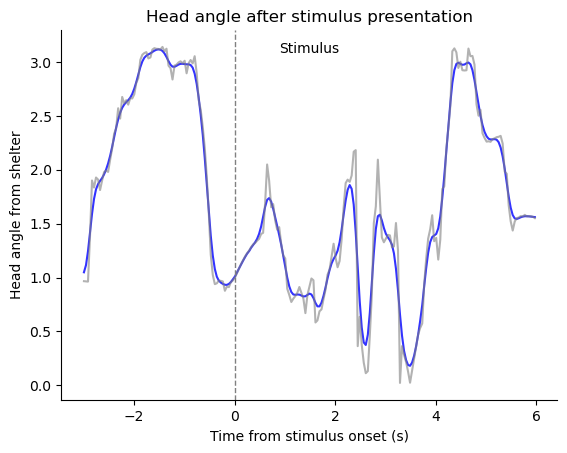

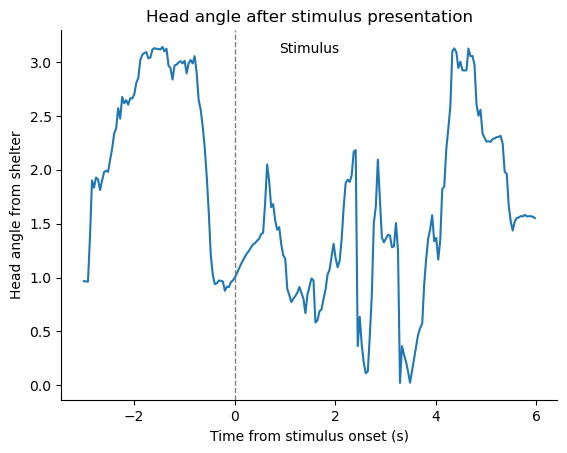

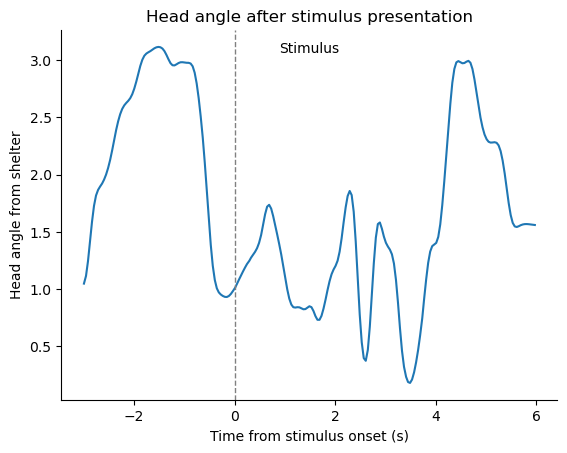

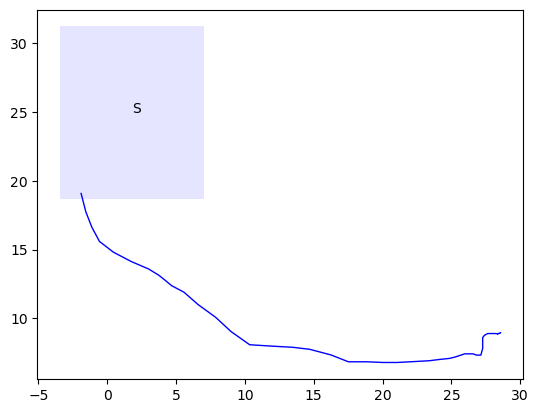

In [3]:
%run graphing_function_recent.ipynb

%run Control_1_stimulus1.ipynb
M1_coord_scaled = coord_scaled
M1_coords = coords
M1_initial_displacement = initial_displacement
M1_total_distance = total_distance
M1_shelter_x = shelter_x
M1_shelter_y = shelter_y
M1_shelter_rotate_x = shelter_rotate_x
M1_shelter_rotate_y = shelter_rotate_y
M1_rotate = rotate
M1_coord_scaled_smooth = coord_scaled_smooth

%run Control_2_stimulus1.ipynb
M2_coord_scaled = coord_scaled
M2_coords = coords
M2_initial_displacement = initial_displacement
M2_total_distance = total_distance
M2_shelter_x = shelter_x
M2_shelter_y = shelter_y
M2_shelter_rotate_x = shelter_rotate_x
M2_shelter_rotate_y = shelter_rotate_y
M2_rotate = rotate
M2_coord_scaled_smooth = coord_scaled_smooth


%run Control_3_stimulus1.ipynb
M3_coord_scaled = coord_scaled
M3_coords = coords
M3_initial_displacement = initial_displacement
M3_total_distance = total_distance
M3_shelter_x = shelter_x
M3_shelter_y = shelter_y
M3_shelter_rotate_x = shelter_rotate_x
M3_shelter_rotate_y = shelter_rotate_y
M3_rotate = rotate
M3_coord_scaled_smooth = coord_scaled_smooth


%run Control_4_stimulus1.ipynb
M4_coord_scaled = coord_scaled
M4_coords = coords
M4_initial_displacement = initial_displacement
M4_total_distance = total_distance
M4_shelter_x = shelter_x
M4_shelter_y = shelter_y
M4_shelter_rotate_x = shelter_rotate_x
M4_shelter_rotate_y = shelter_rotate_y
M4_rotate = rotate
M4_coord_scaled_smooth = coord_scaled_smooth


In [4]:
n=4

In [5]:
def compile_parameters():
    plt.figure()
    ax=plt.axes()

    x = displacement_inter_six['time']
    y = displacement_inter_six['average']
    y_up = displacement_inter_six['SEM_up']
    y_down = displacement_inter_six['SEM_down']

    ax.plot(x,y, label = 'displacement')
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Normalized values') #convert to cm - cm/s
    ax.set_title('Average displacement, speed, and head angle after stimulus onset')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    xs = speed_inter_six['time']
    ys = speed_inter_six['average']
    y_ups = speed_inter_six['SEM_up']
    y_downs = speed_inter_six['SEM_down']

    ax.plot(xs,ys, color='red', label = 'speed')
    ax.plot(xs,y_ups, color = 'none')
    ax.plot(xs,y_downs, color = 'none')
    plt.fill_between(xs,y_ups, y_downs, color = 'red', alpha = .05)

    xa = angle_inter_six['time']
    ya = angle_inter_six['average']
    y_upa = angle_inter_six['SEM_up']
    y_downa = angle_inter_six['SEM_down']

    ax.plot(xa,ya, color='green', label = 'head angle')
    ax.plot(xa,y_upa, color = 'none')
    ax.plot(xa,y_downa, color = 'none')
    plt.fill_between(xa,y_upa, y_downa, color = 'green', alpha = .05)

    plt.legend(loc = 'upper right')
    return plt

In [6]:
def plot_linearity_ratio(n):
    plt.figure()
    ax = plt.axes()
    
    max_x = float('-inf')
    min_x = float('inf')


    for i in range(1, n+1):
        x_data = globals()[f'M{i}_initial_displacement']
        y_data = globals()[f'M{i}_total_distance']
        ax.scatter(x_data, y_data)
        
        # Update min and max values for x and y data
        max_x = max(max_x, x_data.max())
        min_x = min(min_x, x_data.min())
    
    # Plot y=x line based on x_data range
    ax.plot([min_x, max_x], [min_x, max_x], color='gray', linestyle='--', linewidth=1)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    
    ax.set_ylabel('Total distance traveled (cm)') #convert to cm - cm/s
    ax.set_title('Initial displacement from shelter (cm)')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
            
    return plt

In [7]:
#input mice number, start, stop, step, column, dataframe

#interpolated coord_scaled
displacement_inter_6 = interpolate_all(4, -3, 6, .04, 'displacement', 'coord_scaled')
speed_inter_6 = interpolate_all(4, -3, 6, .04, 'speed', 'coord_scaled')
angle_inter_6 = interpolate_all(4, -3, 6, .04, 'head_angle', 'coord_scaled')

#interpolated coord_scaled_smooth
displacement_inter_6_smooth = interpolate_all(4, -3, 6, .04, 'displacement', 'coord_scaled_smooth')
speed_inter_6_smooth = interpolate_all(4, -3, 6, .04, 'speed', 'coord_scaled_smooth')
angle_inter_6_smooth = interpolate_all(4, -3, 6, .04, 'head_angle', 'coord_scaled_smooth')


#normalized versions:
displacement_inter_6_norm = normalize_all(displacement_inter_6)
speed_inter_6_norm = normalize_all(speed_inter_6)
angle_inter_6_norm = normalize_all(angle_inter_6)


displacement_inter_6_smooth_norm = normalize_all(displacement_inter_6_smooth)
speed_inter_6_smooth_norm = normalize_all(speed_inter_6_smooth)
angle_inter_6_smooth_norm = normalize_all(angle_inter_6_smooth)

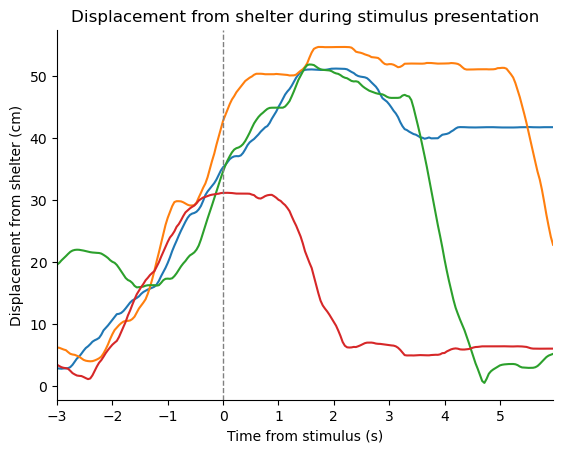

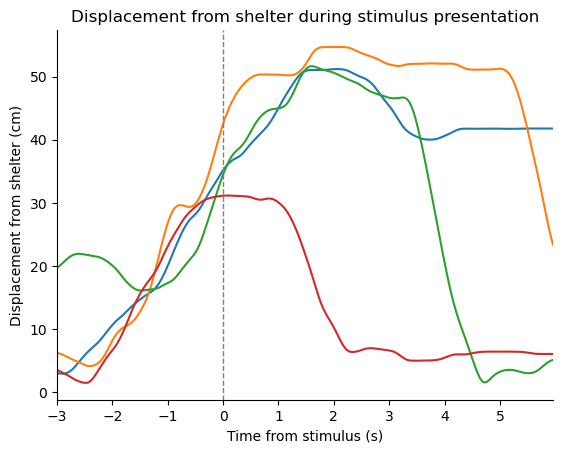

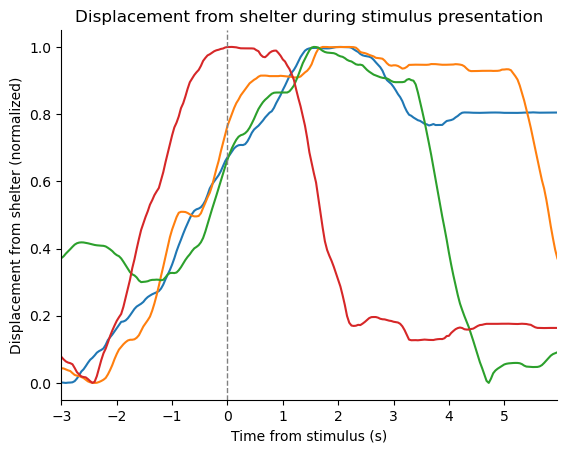

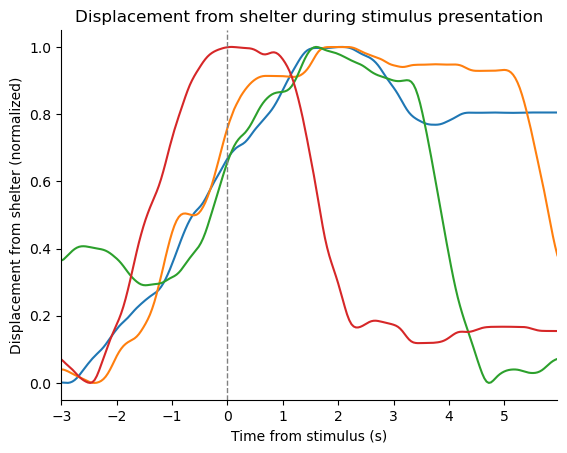

In [8]:
plot_all_displacement(n,displacement_inter_6, 6, False)
plot_all_displacement(n,displacement_inter_6_smooth, 6, False)

plot_all_displacement(n,displacement_inter_6_norm, 6, True)
plot_all_displacement(n,displacement_inter_6_smooth_norm, 6, True)

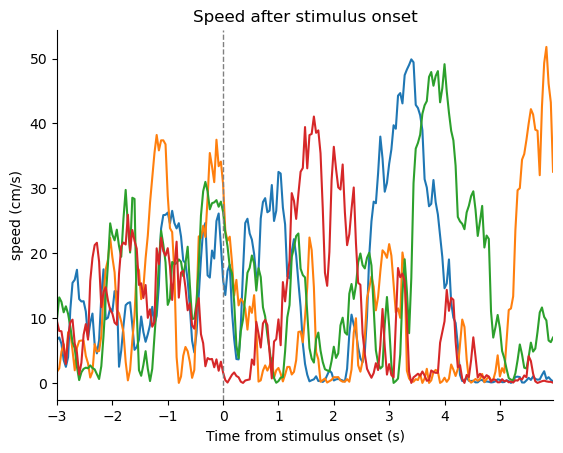

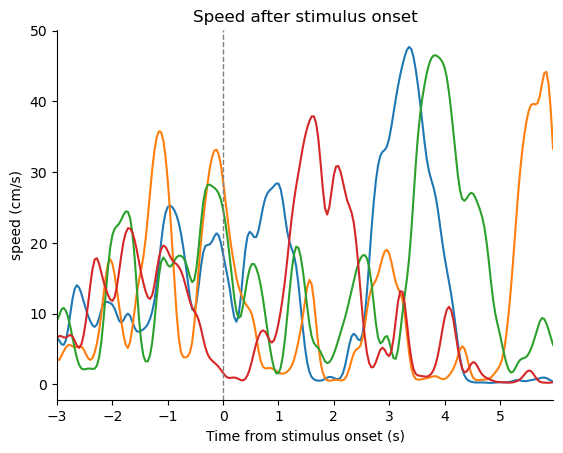

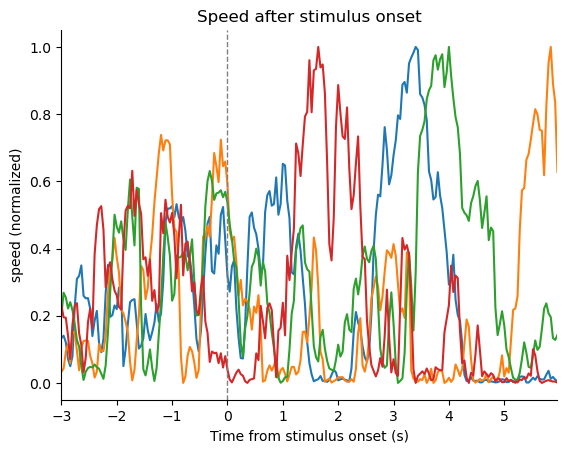

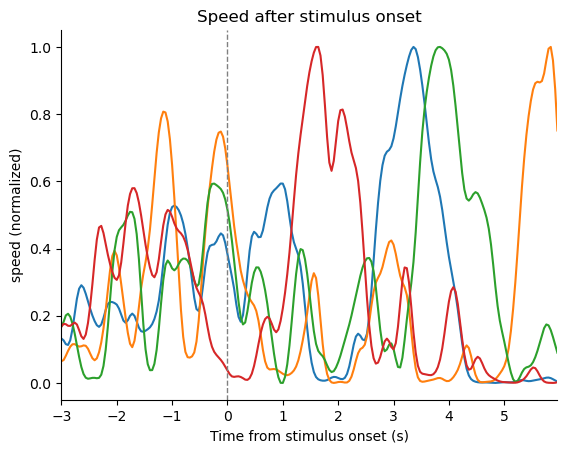

In [9]:
plot_all_speed(n,speed_inter_6, 6, False)
plot_all_speed(n,speed_inter_6_smooth, 6, False)

plot_all_speed(n,speed_inter_6_norm, 6, True)
plot_all_speed(n,speed_inter_6_smooth_norm, 6, True)

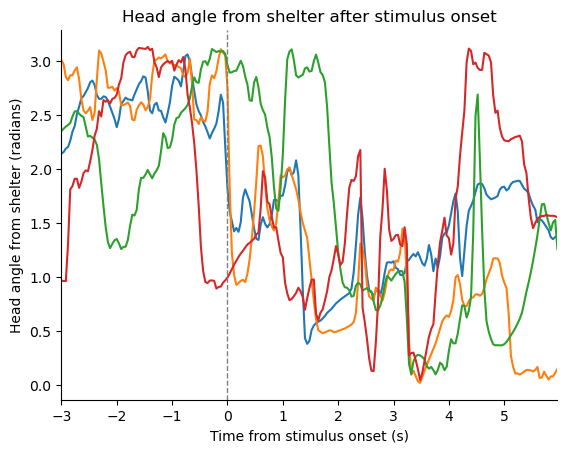

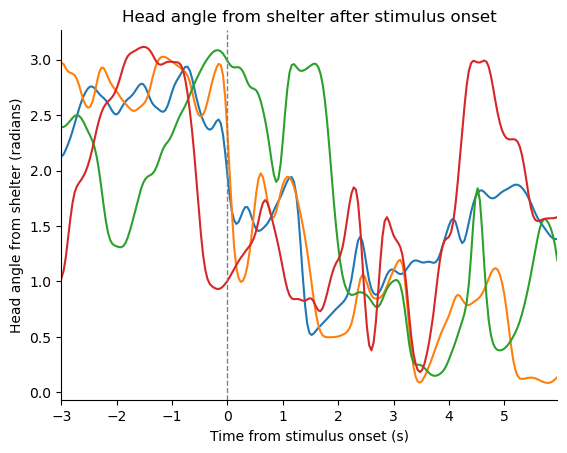

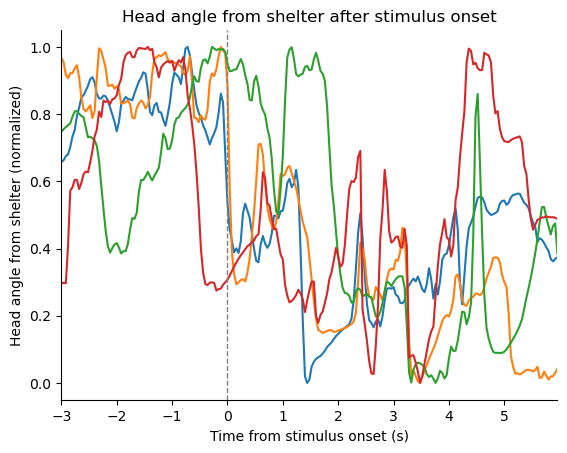

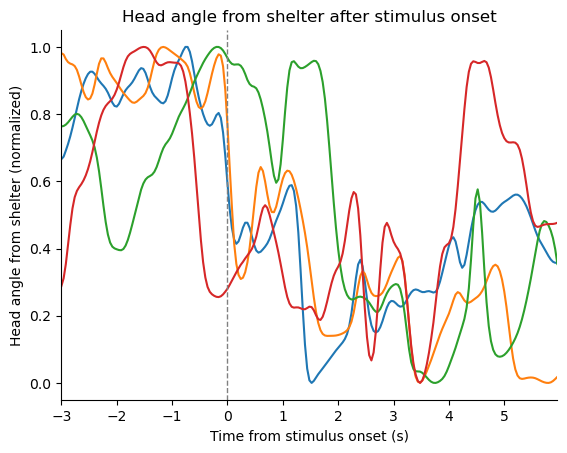

In [10]:
plot_all_angle(n,angle_inter_6, 6, False)
plot_all_angle(n,angle_inter_6_smooth, 6, False)

plot_all_angle(n,angle_inter_6_norm, 6, True)
plot_all_angle(n,angle_inter_6_smooth_norm, 6, True)

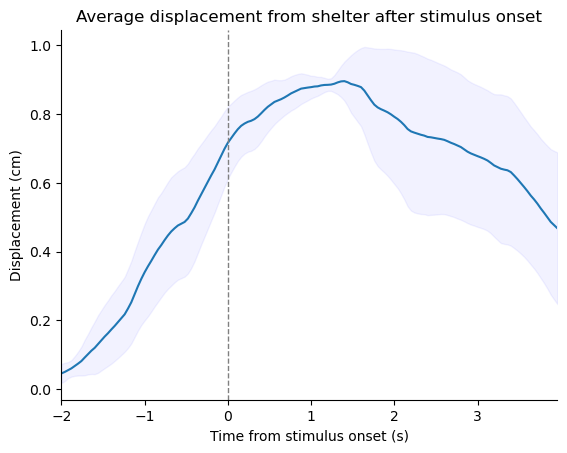

In [8]:
plot_compiled_displacement(displacement_inter_four,7.5, 4)

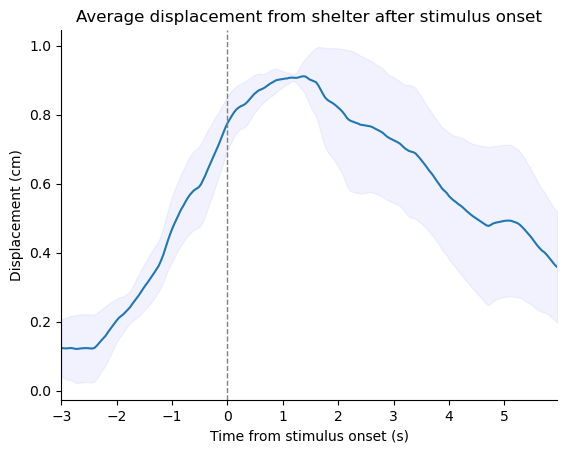

In [9]:
plot_compiled_displacement(displacement_inter_six, 7.5,4)

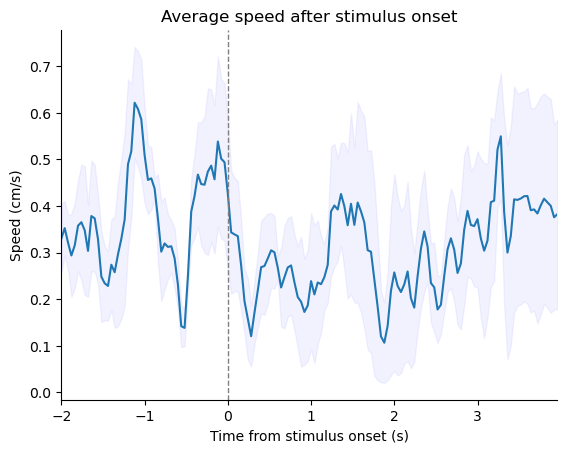

In [10]:
plot_compiled_speed(speed_inter_four,7.5, 4)

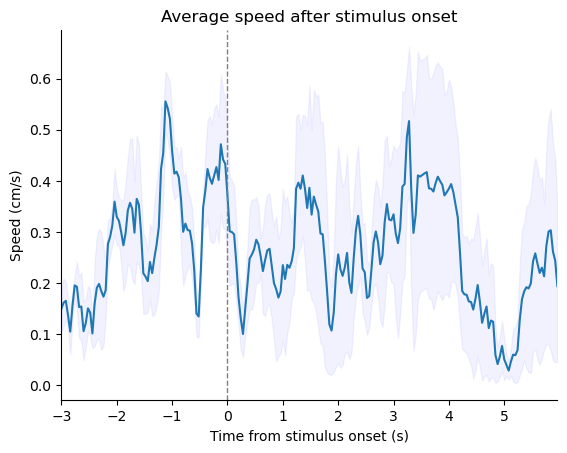

In [11]:
plot_compiled_speed(speed_inter_six, 7.5,4)

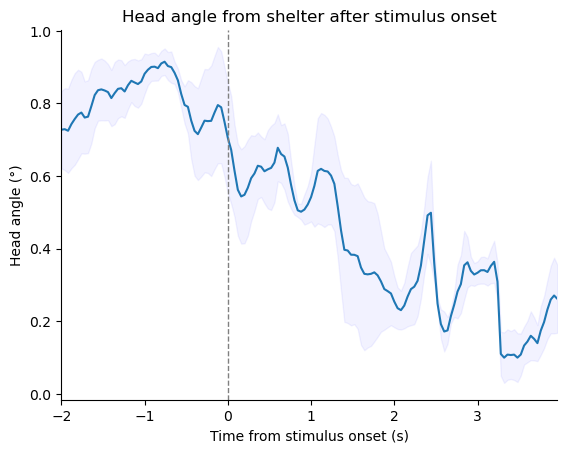

In [12]:
plot_compiled_angle(angle_inter_four,7.5, 4)

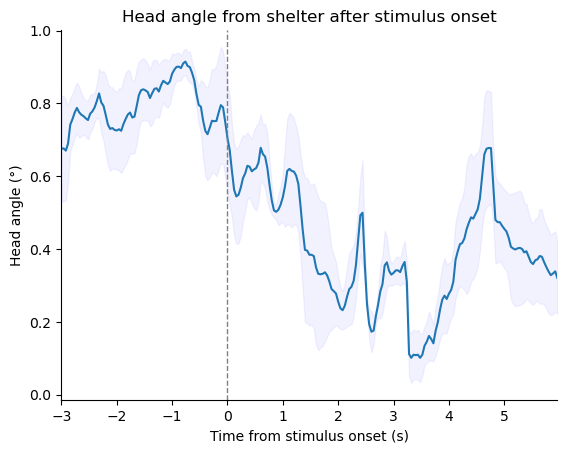

In [13]:
plot_compiled_angle(angle_inter_six, 7.5,4)

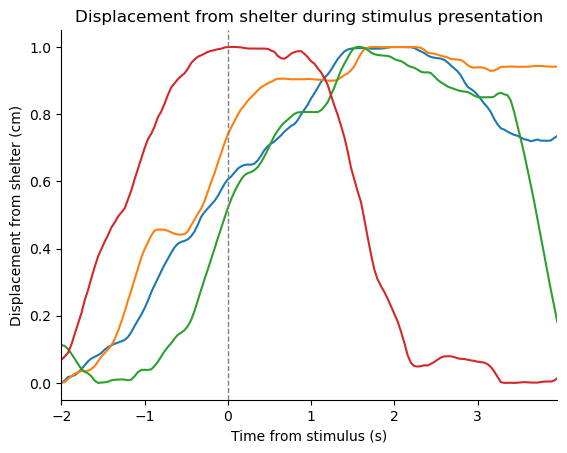

In [14]:
plot_all_displacement(displacement_inter_four, mouse_columns(n, 'four_second_interpolated'), 7, 4)



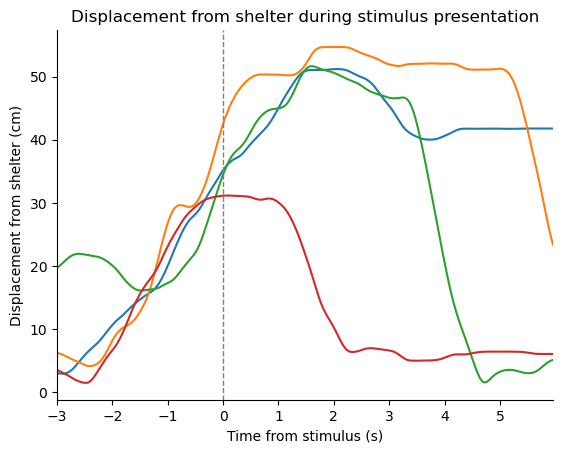

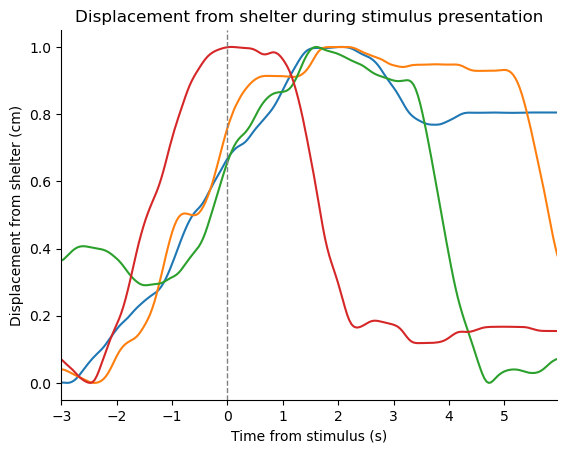

In [62]:
plot_all_displacement(4, displacement_inter_6, 6)
plot_all_displacement(4, normalized_interpolated_displacement_6, 6)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

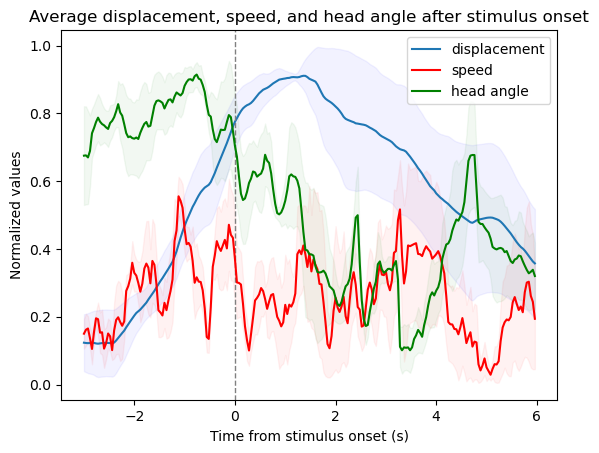

In [16]:
compile_parameters()

NameError: name 'mouse_columns' is not defined

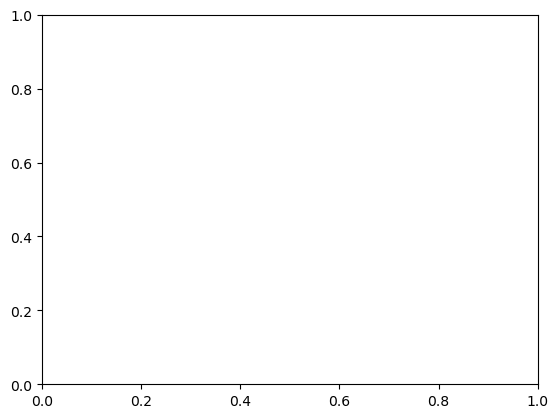

In [7]:
plot_compiled_trajectory(4)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

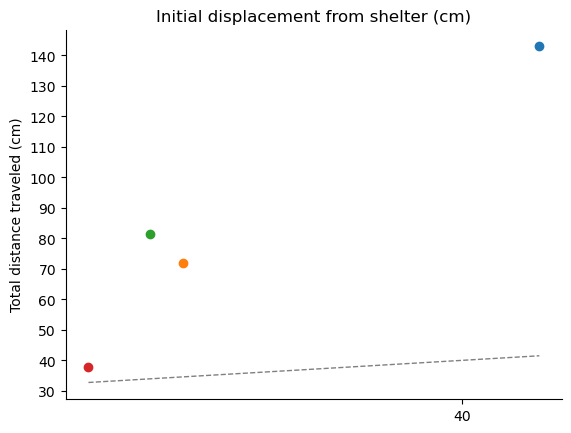

In [18]:
plot_linearity_ratio(n)